In [7]:
# Please change the following to your own PAPER api key and secret
# or set them as environment variables (ALPACA_API_KEY, ALPACA_SECRET_KEY).
# You can get them from https://alpaca.markets/

api_key = None
secret_key = None

#### We use paper environment for this example ####
paper = True # Please do not modify this. This example is for paper trading only.
####

# Below are the variables for development this documents
# Please do not change these variables
trade_api_url = None
trade_api_wss = None
data_api_url = None
stream_data_wss = None

In [8]:
from dotenv import load_dotenv

load_dotenv()

import os

if api_key is None:
    api_key = os.environ.get('ALPACA_API_KEY')

if secret_key is None:
    secret_key = os.environ.get('ALPACA_SECRET_KEY')

In [9]:
# install alpaca-py if it is not available
try:
    import alpaca
except ImportError:
    %pip install alpaca-py
    import alpaca

In [10]:
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo

from alpaca.trading.client import TradingClient
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from alpaca.data.historical.corporate_actions import CorporateActionsClient
from alpaca.data.historical.stock import StockHistoricalDataClient
from alpaca.trading.stream import TradingStream
from alpaca.data.live.stock import StockDataStream

from alpaca.data.requests import (
    CorporateActionsRequest,
    StockBarsRequest,
    StockQuotesRequest,
    StockTradesRequest,
)
from alpaca.trading.requests import (
    ClosePositionRequest,
    GetAssetsRequest,
    GetOrdersRequest,
    LimitOrderRequest,
    MarketOrderRequest,
    StopLimitOrderRequest,
    StopLossRequest,
    StopOrderRequest,
    TakeProfitRequest,
    TrailingStopOrderRequest,
)
from alpaca.trading.enums import (
    AssetExchange,
    AssetStatus,
    OrderClass,
    OrderSide,
    OrderType,
    QueryOrderStatus,
    TimeInForce,
)

In [11]:
# to run async code in jupyter notebook
import nest_asyncio
nest_asyncio.apply()

In [12]:
# check version of alpaca-py
alpaca.__version__

'0.42.0'

# Getting Data


In [13]:
# setup stock historical data client
stock_historical_data_client = StockHistoricalDataClient(api_key, secret_key, url_override = data_api_url)

In [14]:
symbol = "AAPL"

In [18]:
# get historical bars by symbol
# ref. https://docs.alpaca.markets/reference/stockbars-1
now = datetime.now(ZoneInfo("America/New_York"))
req = StockBarsRequest(
    symbol_or_symbols = [symbol],
    timeframe=TimeFrame(amount = 1, unit = TimeFrameUnit.Hour), # specify timeframe
    start = now - timedelta(days = 5),                          # specify start datetime, default=the beginning of the current day.
    # end_date=None,                                        # specify end datetime, default=now
    # limit = 2,                                               # specify limit
)
stock_historical_data_client.get_stock_bars(req).df

open    high     low   close     volume  \
symbol timestamp                                                               
AAPL   2025-07-21 08:00:00+00:00  211.220  211.88  211.22  211.77    29973.0   
       2025-07-21 09:00:00+00:00  211.780  211.95  211.78  211.90    16739.0   
       2025-07-21 10:00:00+00:00  211.940  212.70  211.91  212.40    70925.0   
       2025-07-21 11:00:00+00:00  212.280  212.65  212.07  212.55    58897.0   
       2025-07-21 12:00:00+00:00  212.310  213.00  211.61  212.44  1811300.0   
...                                   ...     ...     ...     ...        ...   
       2025-07-25 19:00:00+00:00  213.790  214.00  213.40  213.96  5992074.0   
       2025-07-25 20:00:00+00:00  213.960  214.01  213.70  214.00  5289653.0   
       2025-07-25 21:00:00+00:00  214.020  214.03  213.81  213.90  1473927.0   
       2025-07-25 22:00:00+00:00  213.881  214.00  213.85  213.92    31347.0   
       2025-07-25 23:00:00+00:00  213.950  214.05  213.91  214.00    21447.0   

                                  trade_count        vwap  
symbol timestamp                                           
AAPL   2025-07-21 08:00:00+00:00       1315.0  211.692770  
       2025-07-21 09:00:00+00:00        676.0  211.881146  
       2025-07-21 10:00:00+00:00       1695.0  212.316094  
       2025-07-21 11:00:00+00:00       1870.0  212.456798  
       2025-07-21 12:00:00+00:00       7692.0  212.466799  
...                                       ...         ...  
       2025-07-25 19:00:00+00:00      78114.0  213.784071  
       2025-07-25 20:00:00+00:00       2031.0  213.879598  
       2025-07-25 21:00:00+00:00        507.0  213.954315  
       2025-07-25 22:00:00+00:00        348.0  213.929873  
       2025-07-25 23:00:00+00:00        322.0  213.949584  

[80 rows x 7 columns]

In [17]:
# get historical trades by symbol
req = StockTradesRequest(
    symbol_or_symbols = [symbol],
    start = now - timedelta(days = 5),                          # specify start datetime, default=the beginning of the current day.
    # end=None,                                             # specify end datetime, default=now
    limit = 20,                                                # specify limit
)
stock_historical_data_client.get_stock_trades(req).df

exchange   price   size  id  \
symbol timestamp                                                      
AAPL   2025-07-21 08:00:00.033819+00:00        K  211.70   17.0   1   
       2025-07-21 08:00:00.036344+00:00        K  211.70   10.0   2   
       2025-07-21 08:00:00.036381+00:00        K  211.70   23.0   3   
       2025-07-21 08:00:00.036388+00:00        K  211.40   21.0   4   
       2025-07-21 08:00:00.037171+00:00        K  212.00    5.0   5   
       2025-07-21 08:00:00.040719+00:00        K  211.71    1.0   6   
       2025-07-21 08:00:00.040752+00:00        K  211.40    4.0   7   
       2025-07-21 08:00:00.040752+00:00        K  211.28    7.0   8   
       2025-07-21 08:00:00.040752+00:00        K  211.28   10.0   9   
       2025-07-21 08:00:00.040752+00:00        K  211.28    5.0  10   
       2025-07-21 08:00:00.040769+00:00        K  211.24    5.0  11   
       2025-07-21 08:00:00.040789+00:00        K  211.23    5.0  12   
       2025-07-21 08:00:00.040790+00:00        K  211.22  133.0  13   
       2025-07-21 08:00:00.040800+00:00        K  211.22  500.0  14   
       2025-07-21 08:00:00.041017+00:00        P  211.88   42.0   1   
       2025-07-21 08:00:00.041473+00:00        K  211.28    3.0  15   
       2025-07-21 08:00:00.041481+00:00        K  211.68    2.0  16   
       2025-07-21 08:00:00.042777+00:00        K  211.94    1.0  17   
       2025-07-21 08:00:00.043474+00:00        K  211.94    2.0  18   
       2025-07-21 08:00:00.043587+00:00        K  211.84    6.0  19   

                                        conditions tape  
symbol timestamp                                         
AAPL   2025-07-21 08:00:00.033819+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.036344+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.036381+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.036388+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.037171+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040719+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040752+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040752+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040752+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040752+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040769+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040789+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.040790+00:00     [@, T]    C  
       2025-07-21 08:00:00.040800+00:00     [@, T]    C  
       2025-07-21 08:00:00.041017+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.041473+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.041481+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.042777+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.043474+00:00  [@, T, I]    C  
       2025-07-21 08:00:00.043587+00:00  [@, T, I]    C

In [19]:
# get historical quotes by symbol
req = StockQuotesRequest(
    symbol_or_symbols = [symbol],
    start = now - timedelta(days = 5),                      # specify start datetime, default=the beginning of the current day.
    # end=None,                                             # specify end datetime, default=now
    limit = 20,                                              # specify limit
)
stock_historical_data_client.get_stock_quotes(req).df

bid_price  bid_size bid_exchange  \
symbol timestamp                                                            
AAPL   2025-07-21 08:00:00.001107+00:00     211.20       4.0            Z   
       2025-07-21 08:00:00.014338+00:00     211.53       2.0            Q   
       2025-07-21 08:00:00.014427+00:00     211.53       2.0            Q   
       2025-07-21 08:00:00.043593+00:00     211.70       1.0            K   
       2025-07-21 08:00:00.043911+00:00     211.53       2.0            Q   
       2025-07-21 08:00:00.046886+00:00     211.88       1.0            P   
       2025-07-21 08:00:00.082530+00:00     211.88       1.0            P   
       2025-07-21 08:00:00.082542+00:00     211.88       1.0            P   
       2025-07-21 08:00:00.125305+00:00     211.75       5.0            P   
       2025-07-21 08:00:00.174328+00:00     211.75       5.0            P   
       2025-07-21 08:00:00.174341+00:00     211.75       5.0            P   
       2025-07-21 08:00:00.886456+00:00     211.75       4.0            P   
       2025-07-21 08:00:00.887040+00:00     211.50       1.0            P   
       2025-07-21 08:00:00.887099+00:00     211.50       1.0            P   
       2025-07-21 08:00:00.887337+00:00     211.50       1.0            P   
       2025-07-21 08:00:00.891034+00:00     211.50       1.0            P   
       2025-07-21 08:00:00.995769+00:00     211.62       2.0            Q   
       2025-07-21 08:00:01.005775+00:00     211.63       2.0            Q   
       2025-07-21 08:00:01.008449+00:00     211.50       1.0            P   
       2025-07-21 08:00:01.008464+00:00     211.53       2.0            Q   

                                         ask_price  ask_size ask_exchange  \
symbol timestamp                                                            
AAPL   2025-07-21 08:00:00.001107+00:00     212.19       3.0            Z   
       2025-07-21 08:00:00.014338+00:00     212.19       3.0            Z   
       2025-07-21 08:00:00.014427+00:00     211.92       4.0            Q   
       2025-07-21 08:00:00.043593+00:00     211.92       4.0            Q   
       2025-07-21 08:00:00.043911+00:00     211.92       4.0            Q   
       2025-07-21 08:00:00.046886+00:00     211.92       4.0            Q   
       2025-07-21 08:00:00.082530+00:00     212.00      18.0            K   
       2025-07-21 08:00:00.082542+00:00     211.94       4.0            Q   
       2025-07-21 08:00:00.125305+00:00     211.94       4.0            Q   
       2025-07-21 08:00:00.174328+00:00     212.00      18.0            K   
       2025-07-21 08:00:00.174341+00:00     211.95       4.0            Q   
       2025-07-21 08:00:00.886456+00:00     211.95       4.0            Q   
       2025-07-21 08:00:00.887040+00:00     211.95       4.0            Q   
       2025-07-21 08:00:00.887099+00:00     211.87       1.0            P   
       2025-07-21 08:00:00.887337+00:00     211.87       1.0            K   
       2025-07-21 08:00:00.891034+00:00     211.95       4.0            Q   
       2025-07-21 08:00:00.995769+00:00     211.95       4.0            Q   
       2025-07-21 08:00:01.005775+00:00     211.95       4.0            Q   
       2025-07-21 08:00:01.008449+00:00     211.95       4.0            Q   
       2025-07-21 08:00:01.008464+00:00     211.95       4.0            Q   

                                        conditions tape  
symbol timestamp                                         
AAPL   2025-07-21 08:00:00.001107+00:00        [R]    C  
       2025-07-21 08:00:00.014338+00:00        [R]    C  
       2025-07-21 08:00:00.014427+00:00        [R]    C  
       2025-07-21 08:00:00.043593+00:00        [R]    C  
       2025-07-21 08:00:00.043911+00:00        [R]    C  
       2025-07-21 08:00:00.046886+00:00        [R]    C  
       2025-07-21 08:00:00.082530+00:00        [R]    C  
       2025-07-21 08:00:00.082542+00:00        [R]    C  
       2025-07-21 08:00:00.125305+00:00        [R]    C  
       2025-0

In [20]:
corporate_actions_client = CorporateActionsClient(api_key, secret_key)
corporate_actions_client.get_corporate_actions(CorporateActionsRequest(
    start=datetime(2020, 1, 1),
    symbols=[symbol]
)).df

id symbol      cusip  \
corporate_action_type                                                           
cash_dividends         23407e01-4eef-4c1e-a2dd-f585c7eabcd0   AAPL              
cash_dividends         235946d4-2605-4e5c-9699-9bfd00452ec0   AAPL  037833100   
cash_dividends         d09386ae-0c2b-4280-8aa0-295e545354b1   AAPL  037833100   
cash_dividends         43032b74-6743-4fef-9a10-de51c464a480   AAPL  037833100   
cash_dividends         65570a16-85fa-4c01-b448-381a789c9248   AAPL  037833100   
cash_dividends         6a0daa4a-c7a1-47f6-8d0d-090a469abb9d   AAPL  037833100   
cash_dividends         141b5396-727a-417f-8983-581281c6ae67   AAPL  037833100   
cash_dividends         9088cb26-23c0-4fd0-ab86-dd7622ee610e   AAPL  037833100   
cash_dividends         9ba01618-fa72-4d1d-8496-2e3b3e64c082   AAPL  037833100   
cash_dividends         31a9feb4-897f-4255-94bf-c3c57ede5839   AAPL  037833100   
cash_dividends         1a74e0a9-c262-4468-8a72-5bdbb2b8db2b   AAPL  037833100   
cash_dividends         c8e480f0-313e-4253-8cd7-9884fd7f242f   AAPL  037833100   
cash_dividends         91e7e0fa-c09c-406c-b2db-b11d51b694a0   AAPL  037833100   
cash_dividends         8aa77f22-c794-49ab-bfc2-f78f3f164e99   AAPL  037833100   
cash_dividends         023c007d-388f-4039-8c06-8acb8e84b725   AAPL  037833100   
cash_dividends         1fbbcf9a-b1ac-4568-b423-0e5585b54025   AAPL  037833100   
cash_dividends         35849a16-e94e-4f9a-b66f-a1333d6289af   AAPL  037833100   
cash_dividends         9007ff08-a343-414c-9fae-61329343e86c   AAPL  037833100   
cash_dividends         522935ff-af66-43d7-bdef-8569793a6b68   AAPL  037833100   
cash_dividends         7edfcacd-0f07-4601-bbbf-c92a1044ea9f   AAPL  037833100   
cash_dividends         f674743b-82d8-45a1-8511-70be39bb1940   AAPL  037833100   
cash_dividends         4cc2f7d9-93f1-4204-8c37-0460669728d3   AAPL  037833100   
forward_splits         d209b6c2-9231-474c-a80e-1a79dacadbb2   AAPL  037833100   

                        rate special foreign process_date     ex_date  \
corporate_action_type                                                   
cash_dividends         0.770   False   False   2020-02-07  2020-02-07   
cash_dividends         0.820   False   False   2020-05-14  2020-05-08   
cash_dividends         0.820   False   False   2020-08-13  2020-08-07   
cash_dividends         0.205   False   False   2020-11-12  2020-11-06   
cash_dividends         0.205   False   False   2021-02-11  2021-02-05   
cash_dividends         0.220   False   False   2021-05-13  2021-05-07   
cash_dividends         0.220   False   False   2021-08-12  2021-08-06   
cash_dividends         0.220   False   False   2021-11-11  2021-11-05   
cash_dividends         0.220   False   False   2022-02-10  2022-02-04   
cash_dividends         0.230   False   False   2022-05-12  2022-05-06   
cash_dividends         0.230   False   False   2022-08-11  2022-08-05   
cash_dividends         0.230   False   False   2022-11-10  2022-11-04   
cash_dividends         0.230   False   False   2023-02-16  2023-02-10   
cash_dividends         0.240   False   False   2023-05-18  2023-05-12   
cash_dividends         0.240   False   False   2023-08-17  2023-08-11   
cash_dividends         0.240   False   False   2023-11-16  2023-11-10   
cash_dividends         0.240   False   False   2024-02-15  2024-02-09   
cash_dividends         0.250   False   False   2024-05-16  2024-05-10   
cash_dividends         0.250   False   False   2024-08-15  2024-08-12   
cash_dividends         0.250   False   False   2024-11-14  2024-11-08   
cash_dividends         0.250   False   False   2025-02-13  2025-02-10   
cash_dividends         0.260   False   False   2025-05-15  2025-05-12   
forward_splits           NaN     NaN     NaN   2020-08-31  2020-08-31   

                      record_date payable_date  new_rate  old_rate  \
corporate_action_type                                                
cash_dividends               None         None       NaN       Na

In [27]:
import pandas as pd

def get_data(symbol, start_date=datetime.now(ZoneInfo("America/New_York"))-timedelta(days=5), end_date=datetime.now(ZoneInfo("America/New_York")), timeframe=TimeFrame(amount = 1, unit = TimeFrameUnit.Hour)):
    # check if the data is already in the csv file
    if os.path.exists(f"data/{symbol}_{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}_{timeframe.amount}_{timeframe.unit}.csv"):
        return pd.read_csv(f"data/{symbol}_{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}_{timeframe.amount}_{timeframe.unit}.csv")
    
    # get historical bars by symbol
    # ref. https://docs.alpaca.markets/reference/stockbars-1
    req = StockBarsRequest(
        symbol_or_symbols = symbol,
        timeframe=timeframe, # specify timeframe
        start = start_date,                          # specify start datetime, default=the beginning of the current day.
        end_date=end_date,                                        # specify end datetime, default=now
        # limit = 2,                                               # specify limit
    )
    data = stock_historical_data_client.get_stock_bars(req).df

    # save the data to a csv file with start date and symbol
    data.to_csv(f"data/{symbol}_{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}_{timeframe.amount}_{timeframe.unit}.csv")
    return data

data = get_data("TSLA")
data.head()

open    high     low   close     volume  \
symbol timestamp                                                              
TSLA   2025-07-21 08:00:00+00:00  333.39  335.00  332.88  334.40   343595.0   
       2025-07-21 09:00:00+00:00  334.36  334.97  334.22  334.32   134755.0   
       2025-07-21 10:00:00+00:00  334.37  334.75  333.94  334.13   201851.0   
       2025-07-21 11:00:00+00:00  334.11  335.20  333.44  335.13   389300.0   
       2025-07-21 12:00:00+00:00  333.67  335.61  333.42  334.41  1217417.0   

                                  trade_count        vwap  
symbol timestamp                                           
TSLA   2025-07-21 08:00:00+00:00      12930.0  334.400432  
       2025-07-21 09:00:00+00:00       5281.0  334.535240  
       2025-07-21 10:00:00+00:00       6607.0  334.319131  
       2025-07-21 11:00:00+00:00      12063.0  334.544178  
       2025-07-21 12:00:00+00:00      27033.0  334.683091

In [ ]:
# open the stocks.txt file and get the data for the first 30 tickers
# hourly data for the past 90 days

with open("stocks.txt", "r") as file:
    stocks = file.readlines()

for stock in stocks[:30]:
    print(stock.strip())
    data = get_data(stock.strip(), start_date=datetime.now(ZoneInfo("America/New_York"))-timedelta(days=90), end_date=datetime.now(ZoneInfo("America/New_York")), timeframe=TimeFrame(amount = 30, unit = TimeFrameUnit.Minute))
    print('length of data', len(data))

NVDA

length of data 1978
MSFT

length of data 1952
AAPL

length of data 1978
AMZN

length of data 1978
META

length of data 1939
AVGO

length of data 1968
GOOGL

length of data 1978
GOOG

length of data 1976
BRK.B

length of data 1795
TSLA

length of data 1978
JPM

length of data 1603
WMT

length of data 1831
LLY

length of data 1475
V

length of data 1384
ORCL

length of data 1829
MA

length of data 1100
NFLX

length of data 1608
XOM

length of data 1792
COST

length of data 1334
JNJ

length of data 1398
PLTR

length of data 1978
HD

length of data 1279
PG

length of data 1414
BAC

length of data 1889
ABBV

length of data 1257
CVX

length of data 1708
KO

length of data 1845
GE

length of data 1489
TMUS

length of data 1247
CSCO

length of data 1759


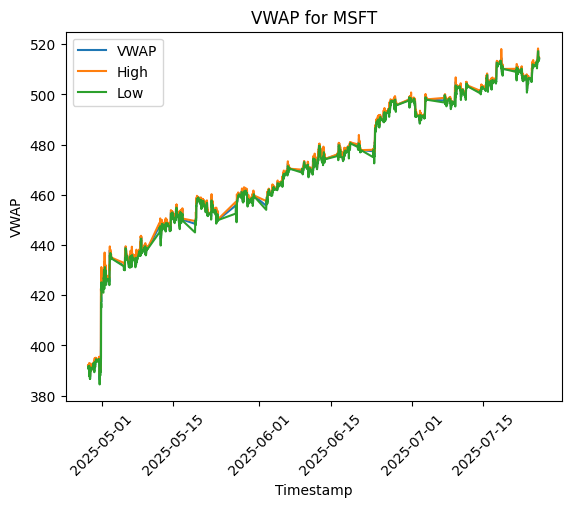

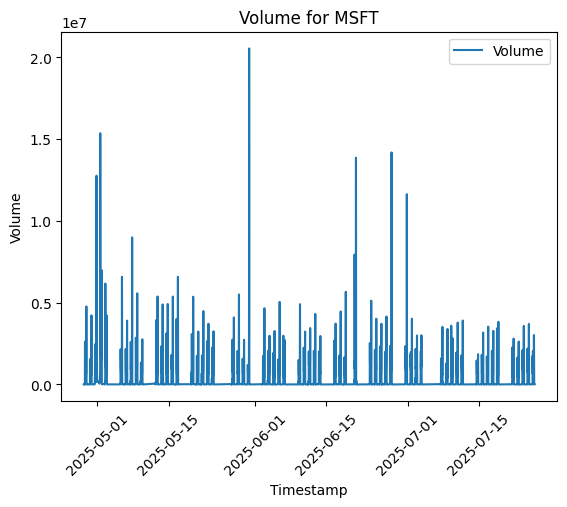

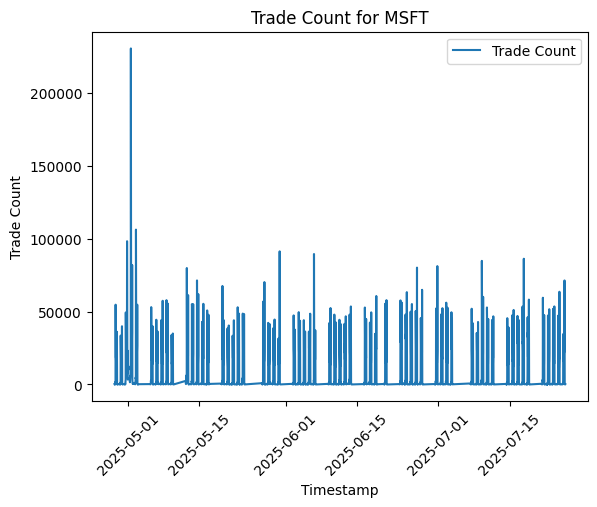

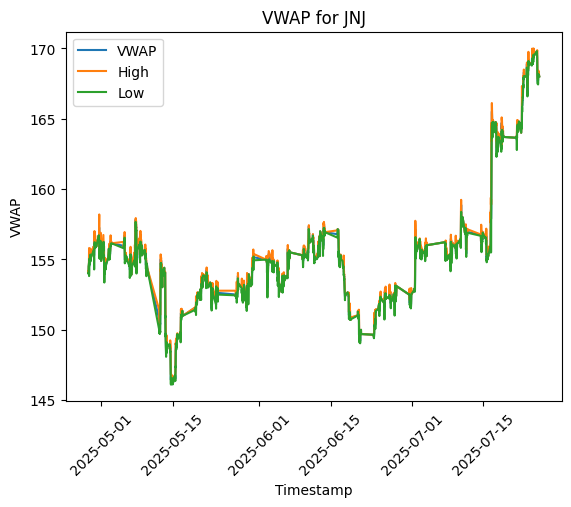

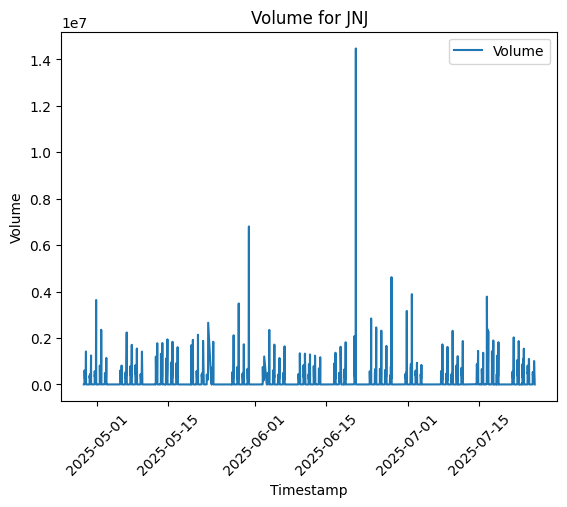

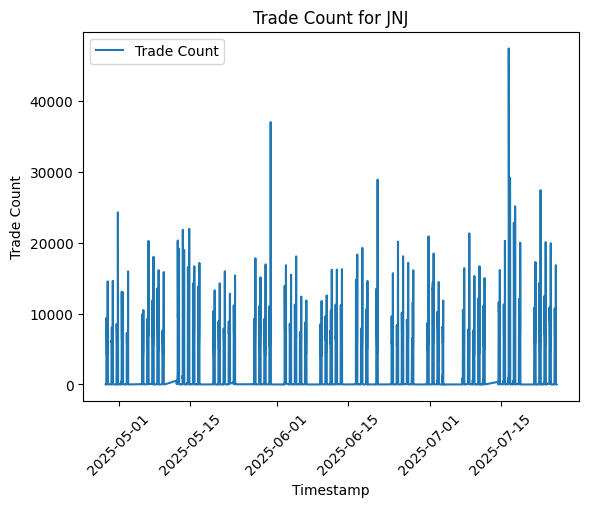

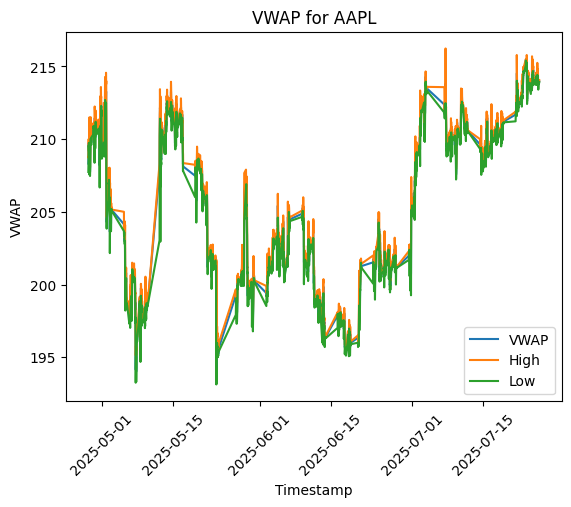

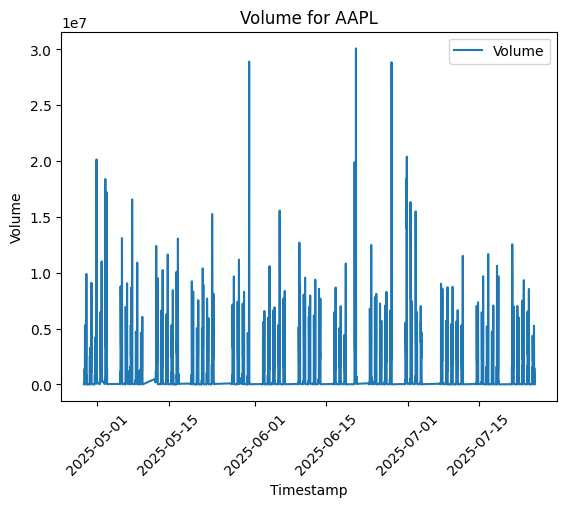

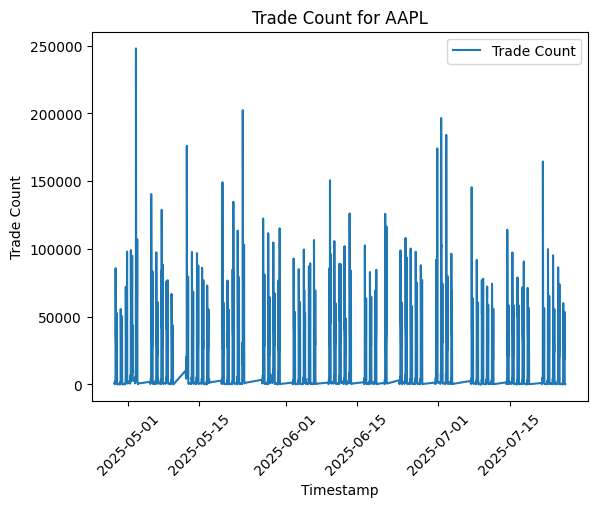

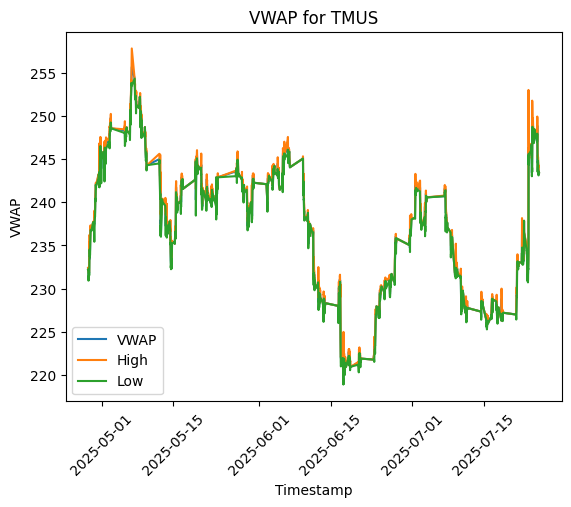

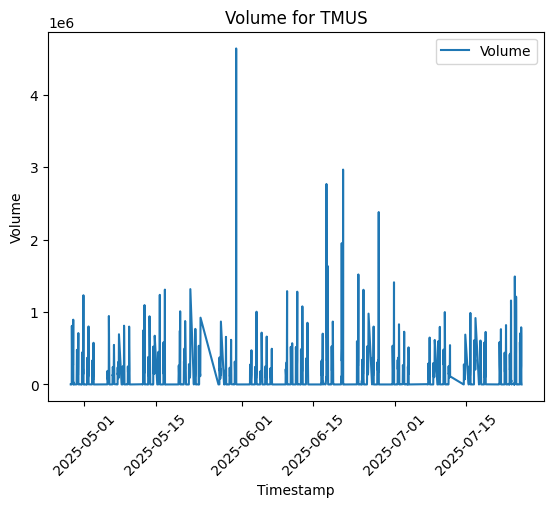

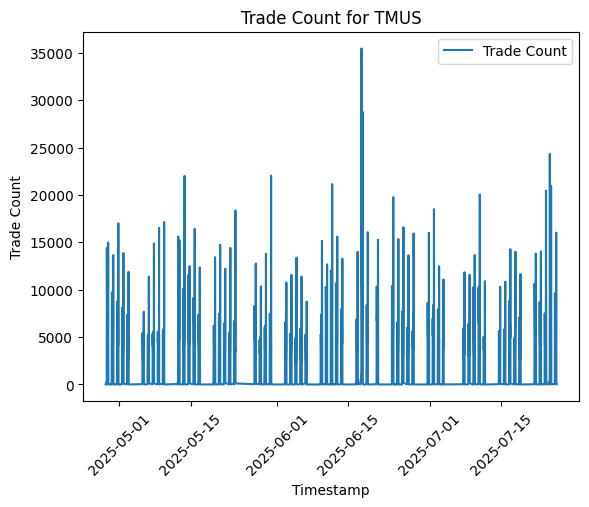

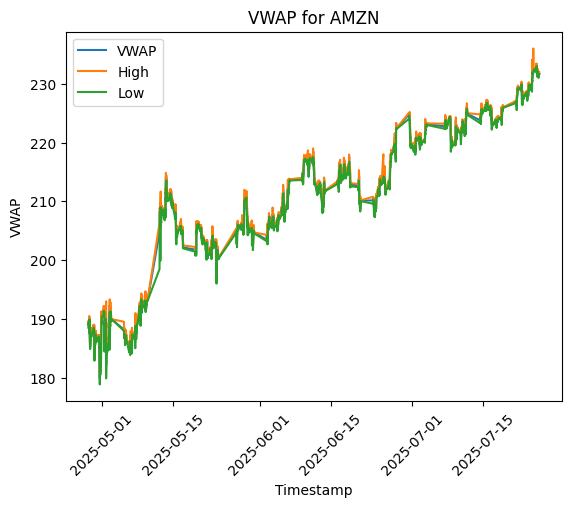

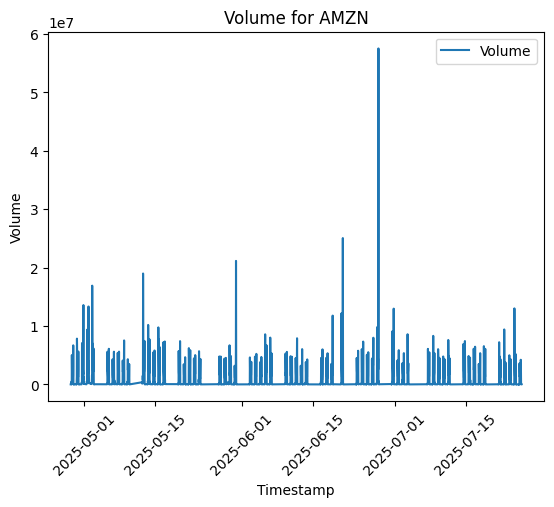

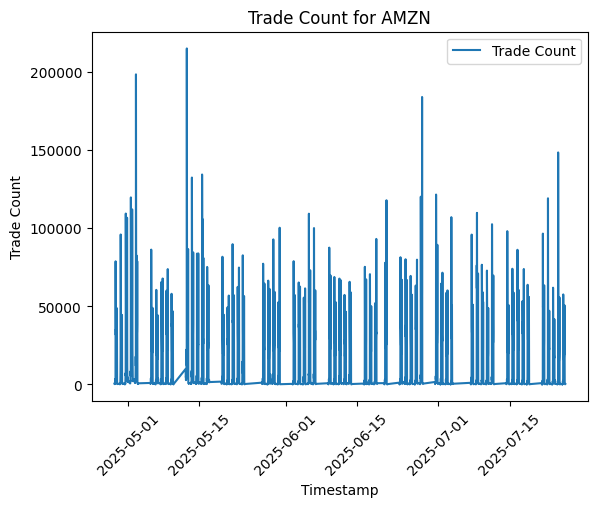

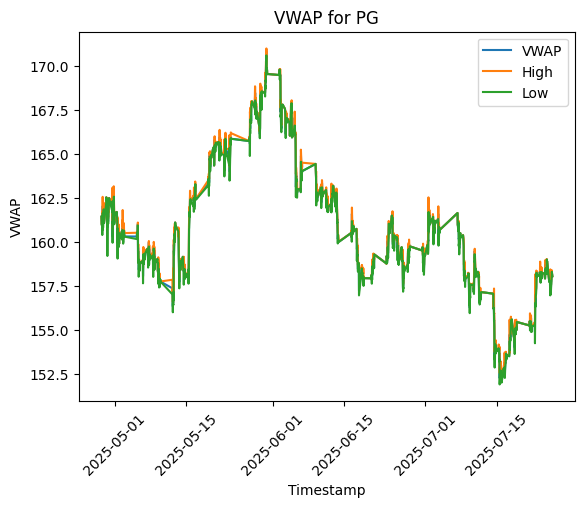

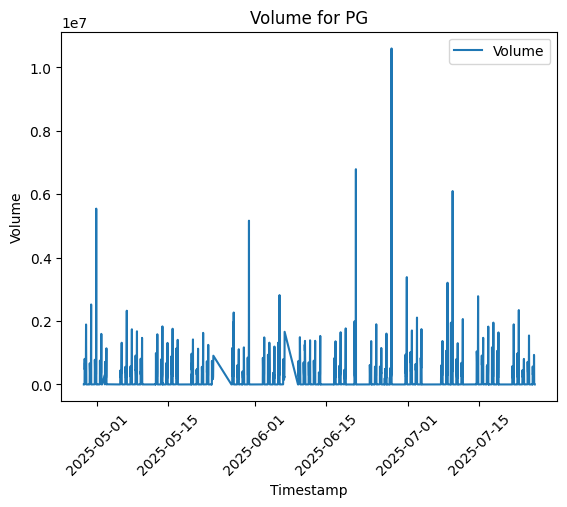

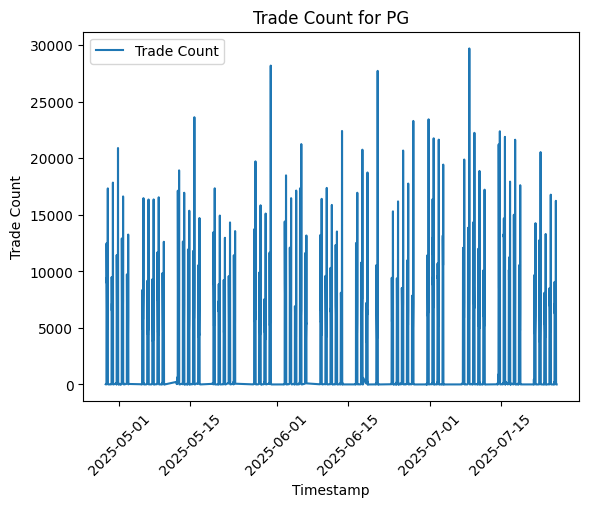

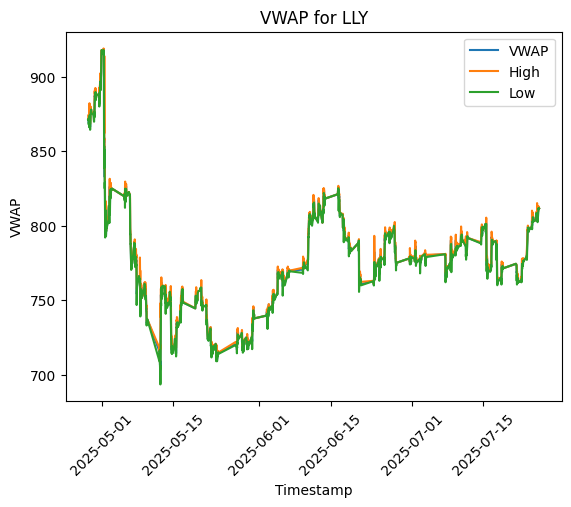

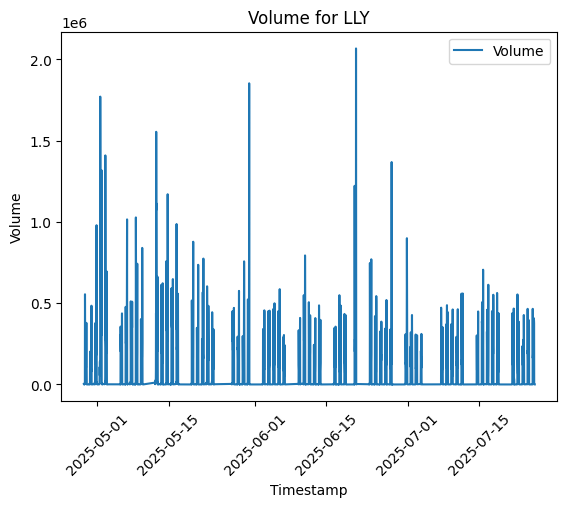

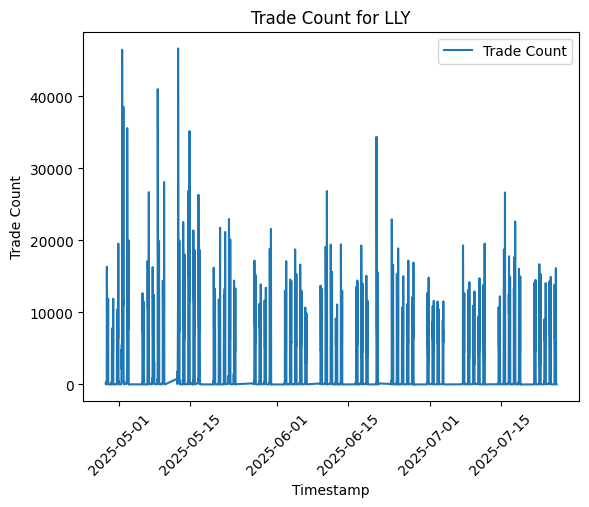

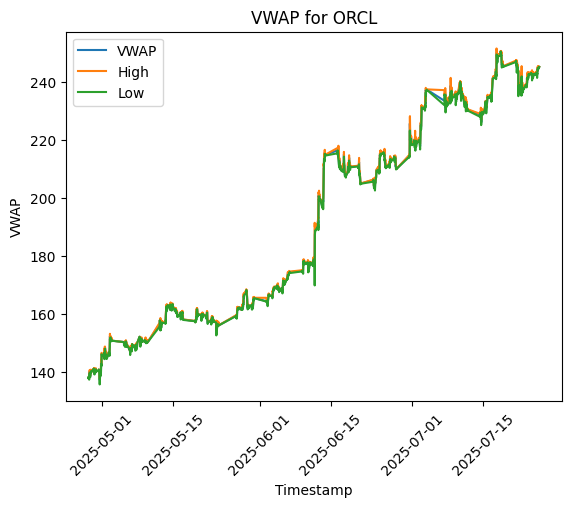

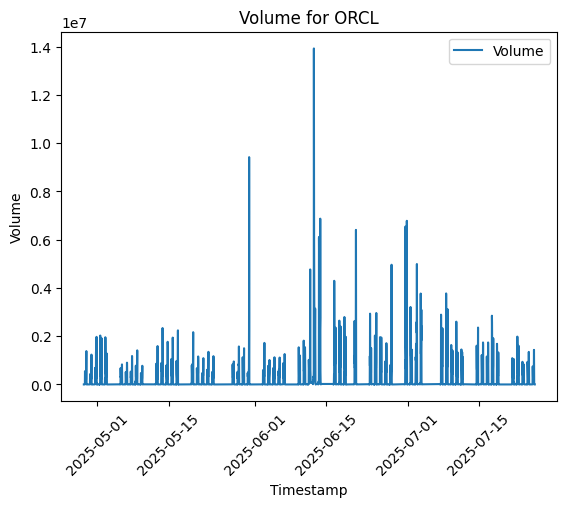

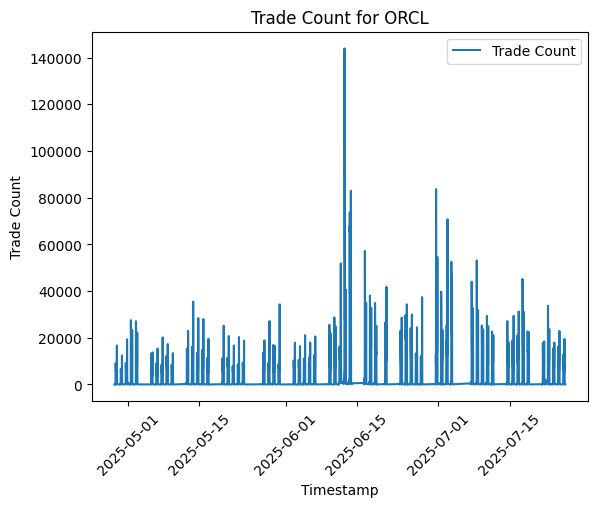

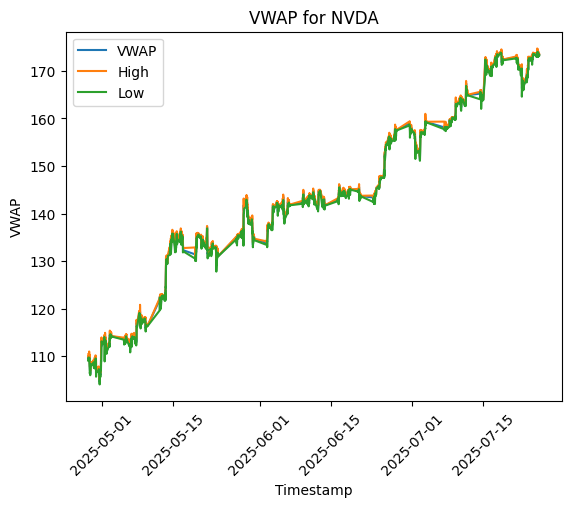

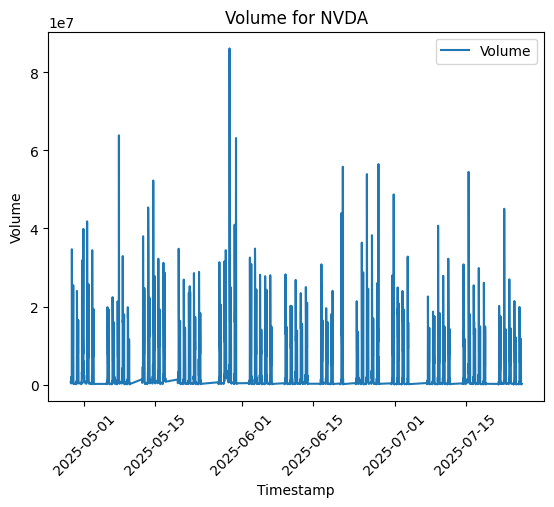

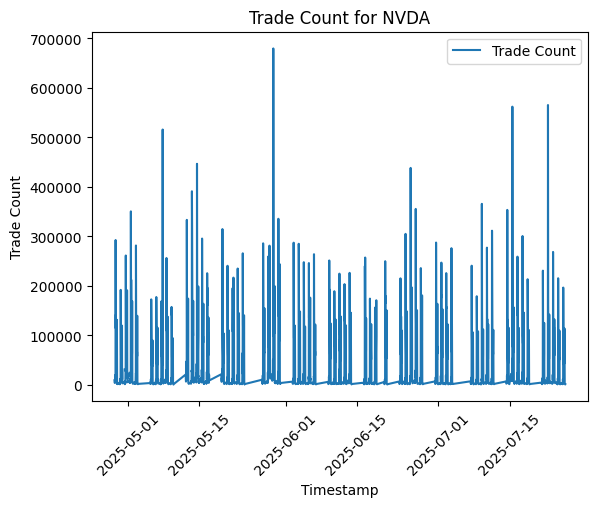

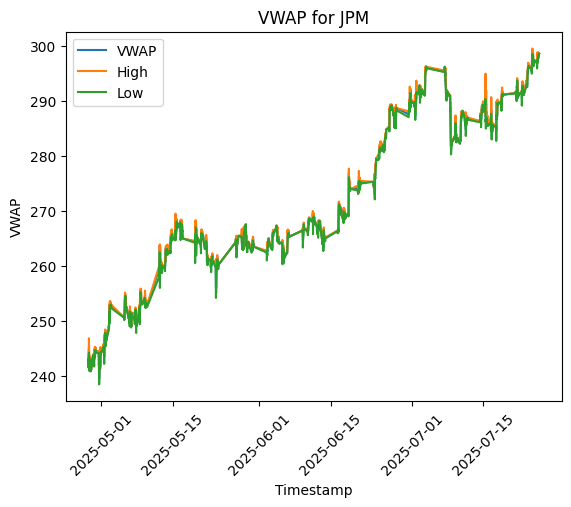

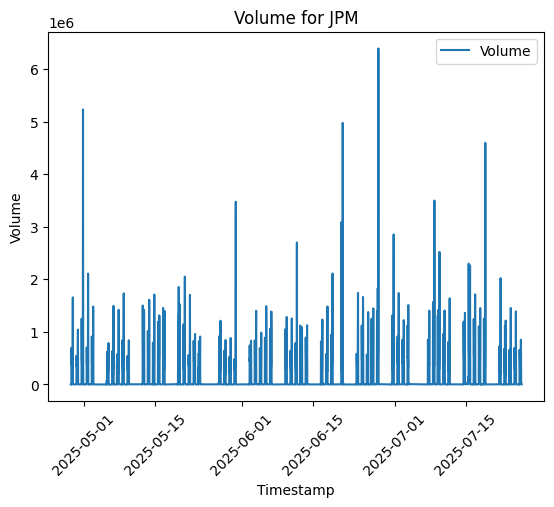

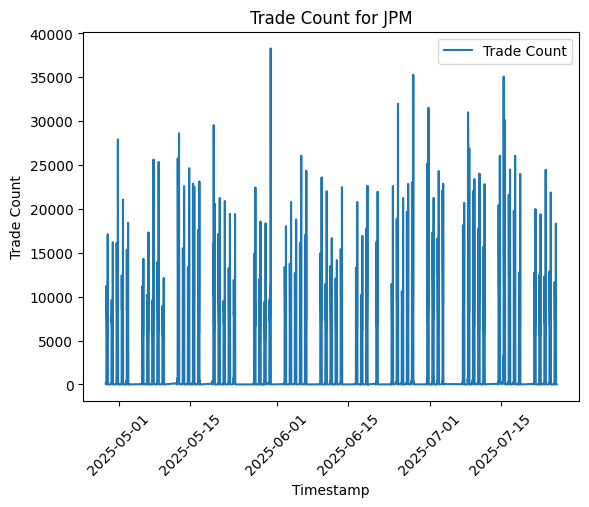

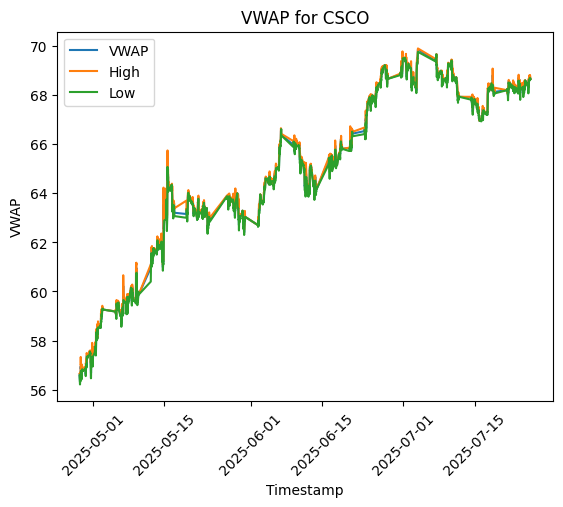

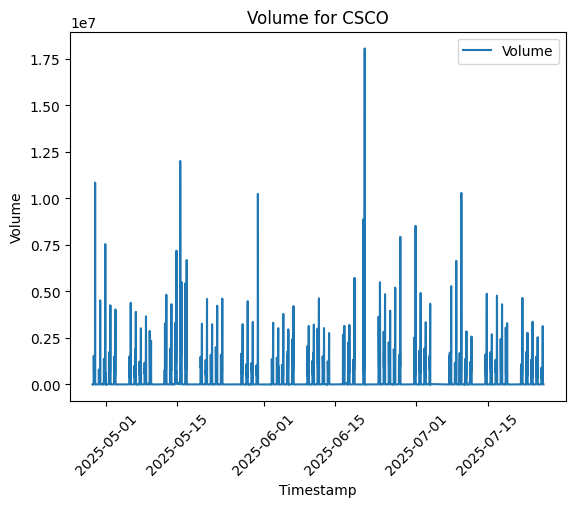

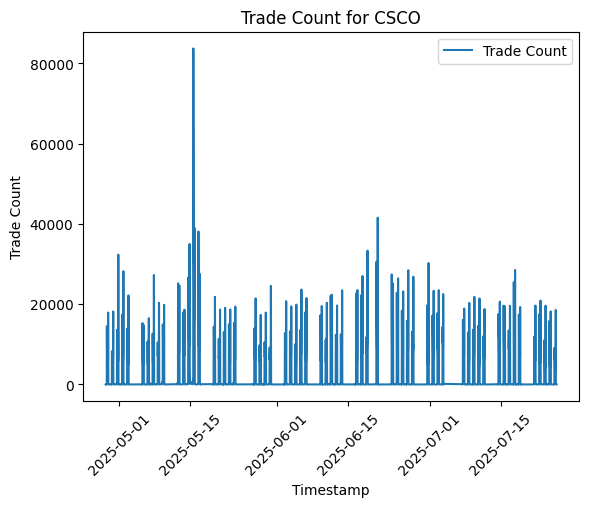

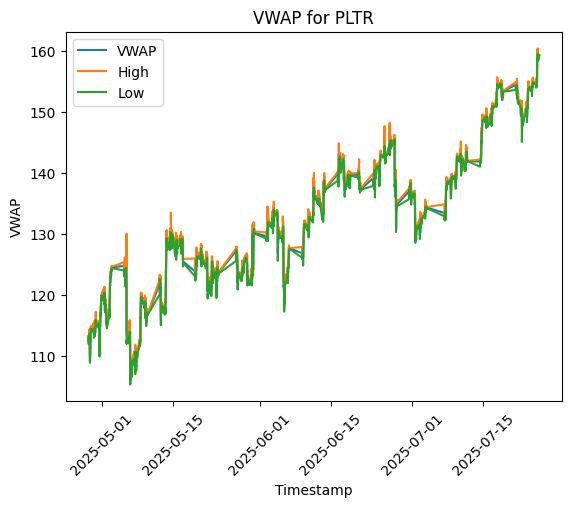

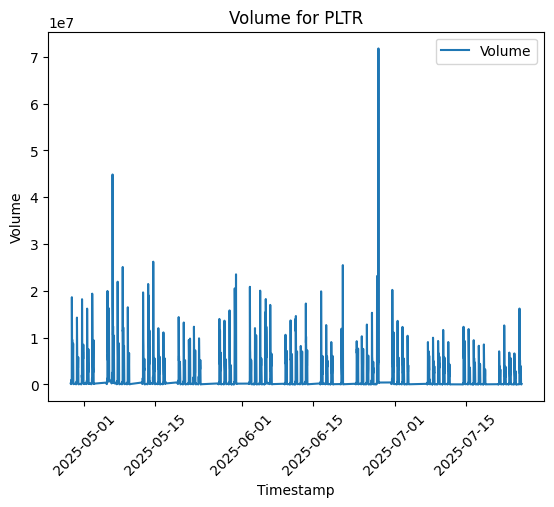

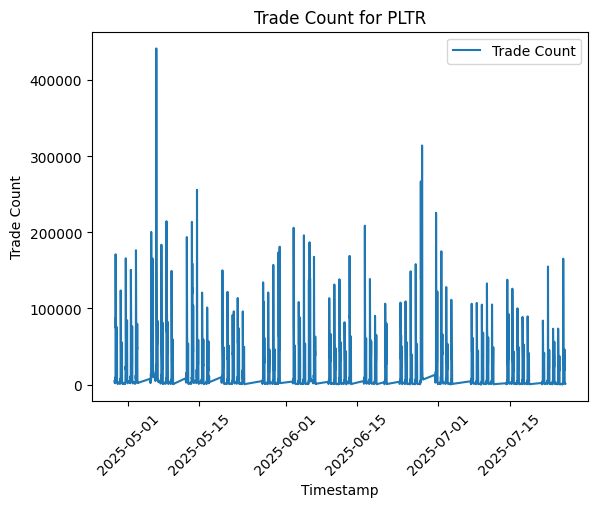

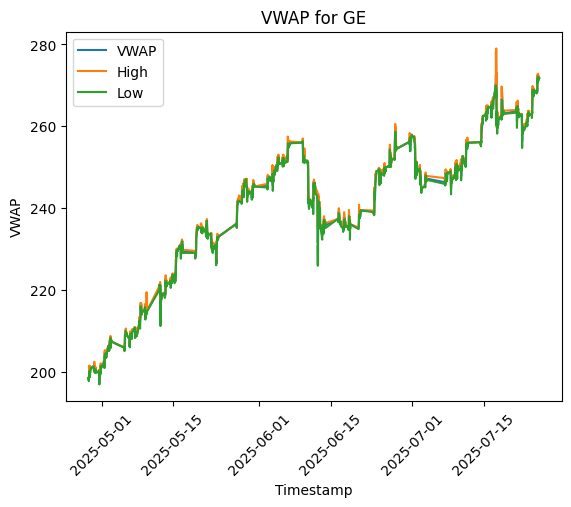

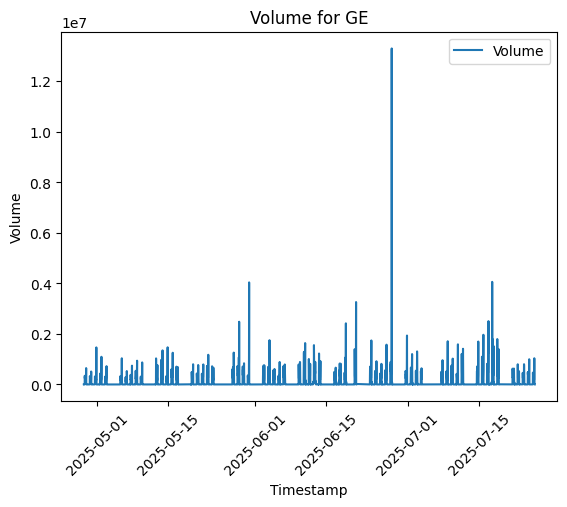

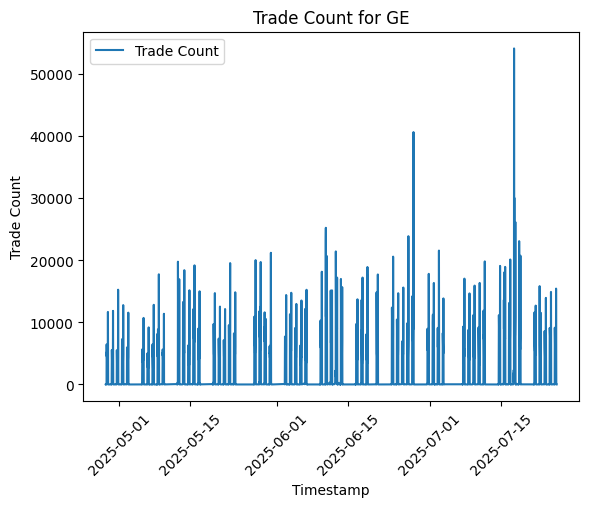

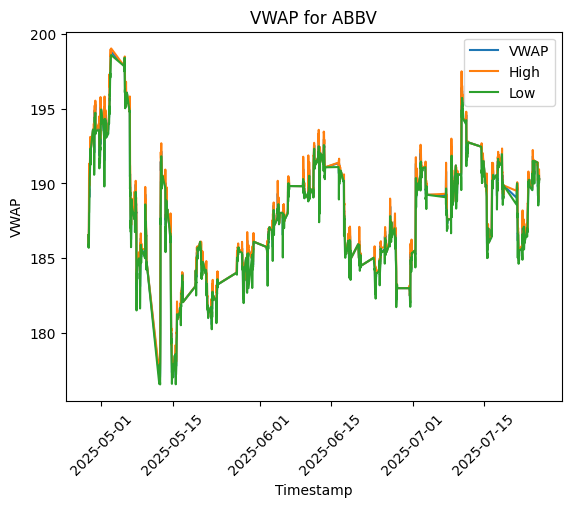

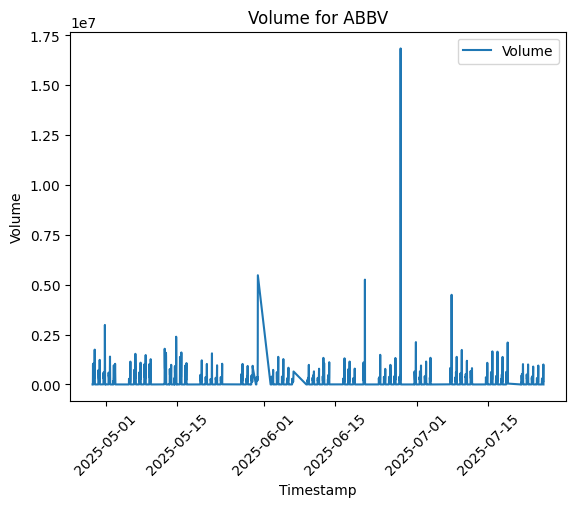

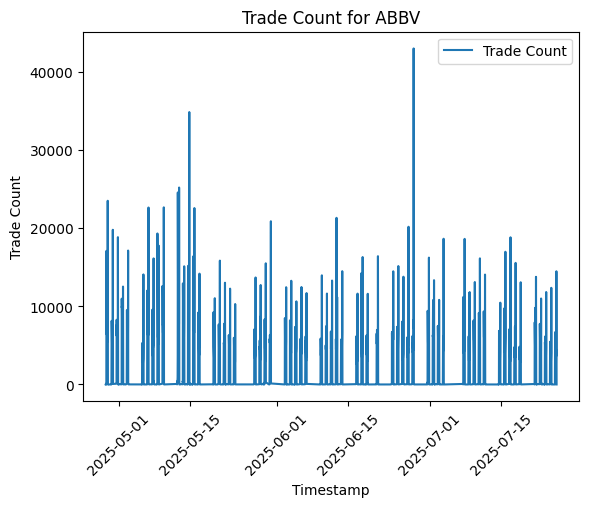

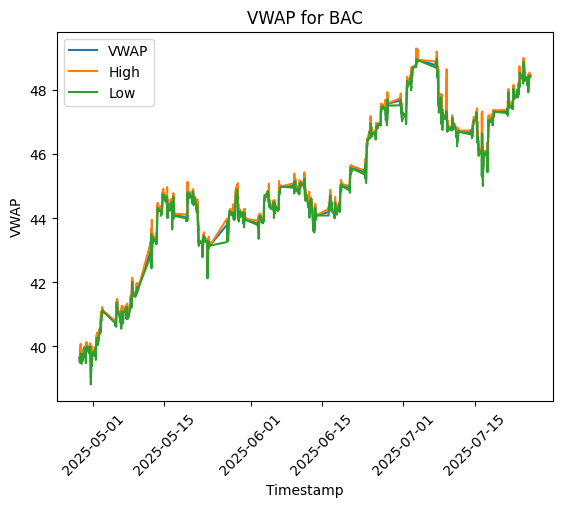

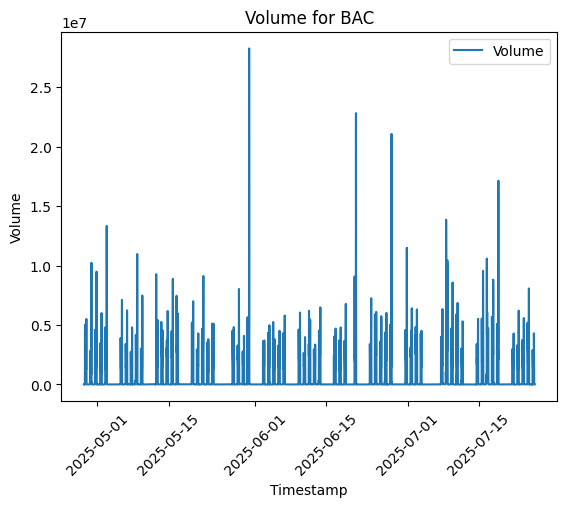

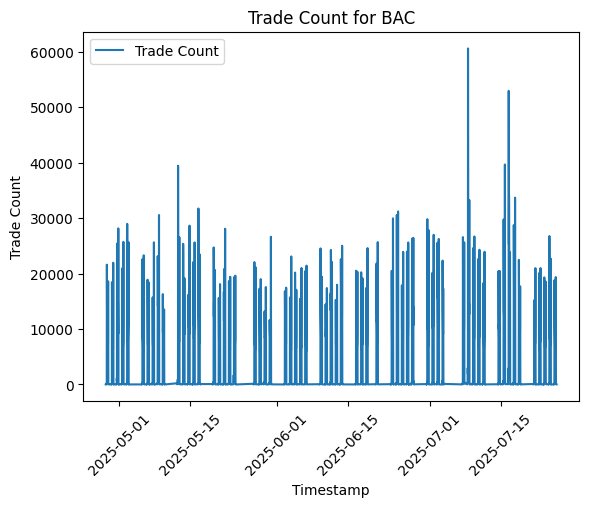

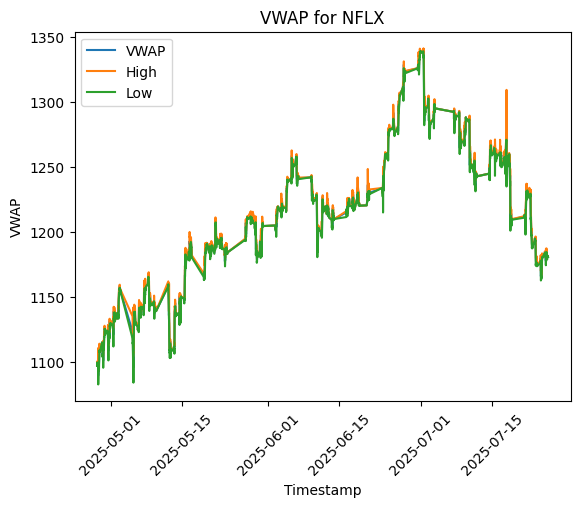

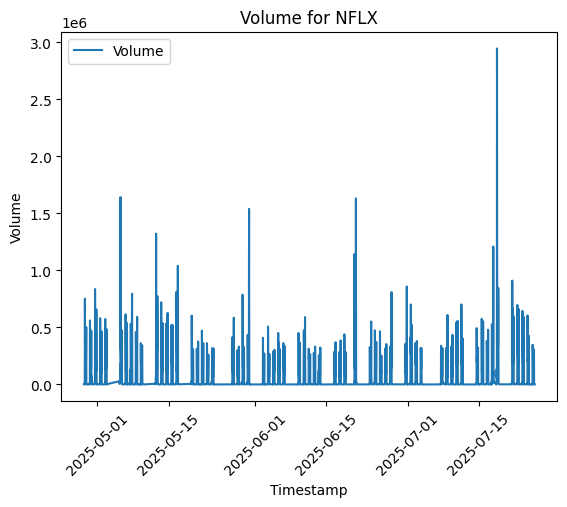

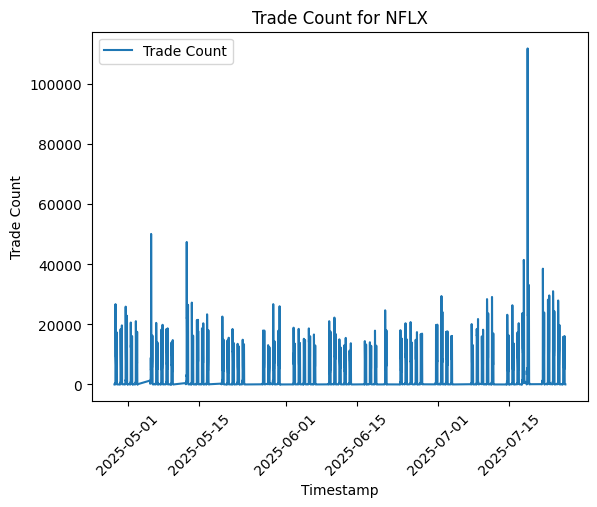

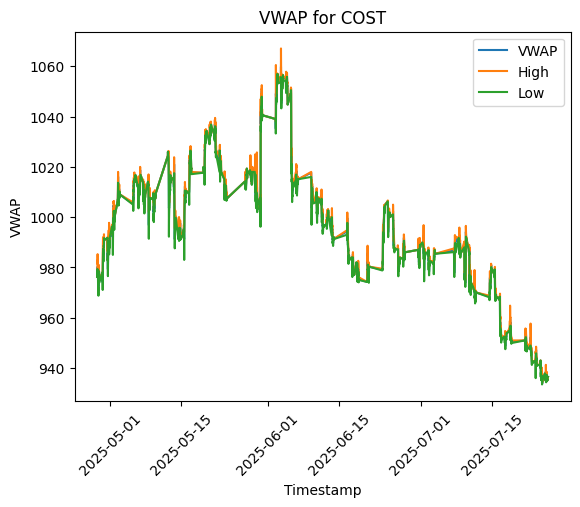

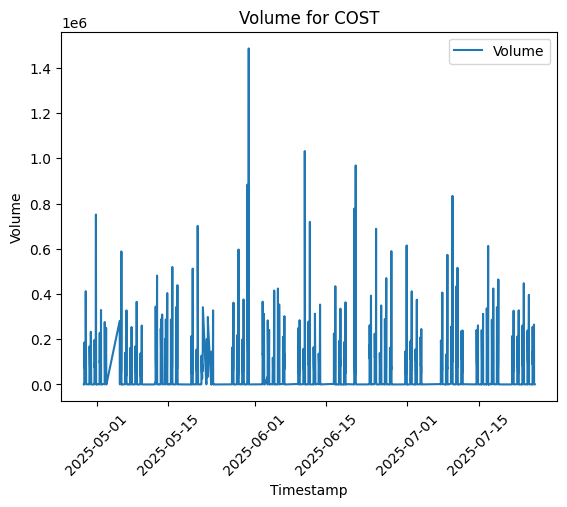

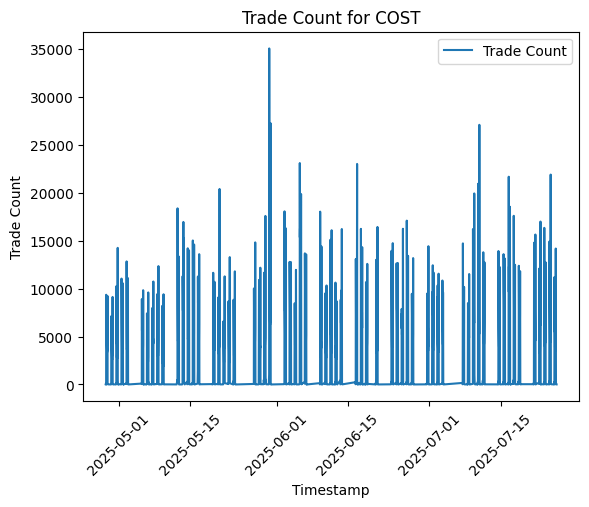

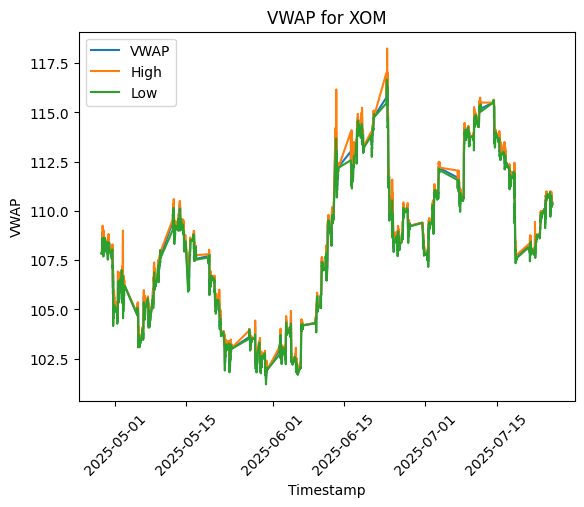

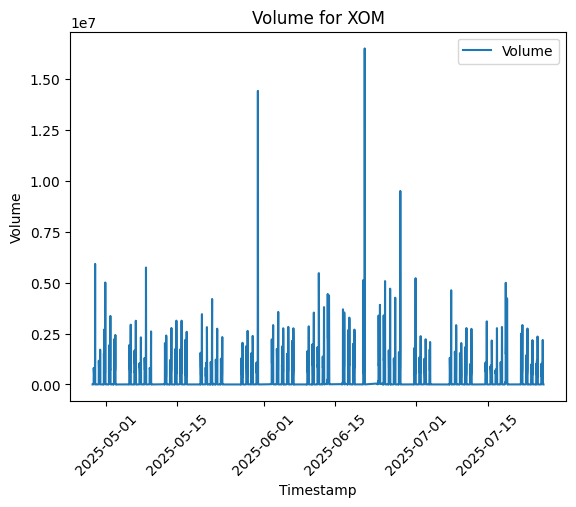

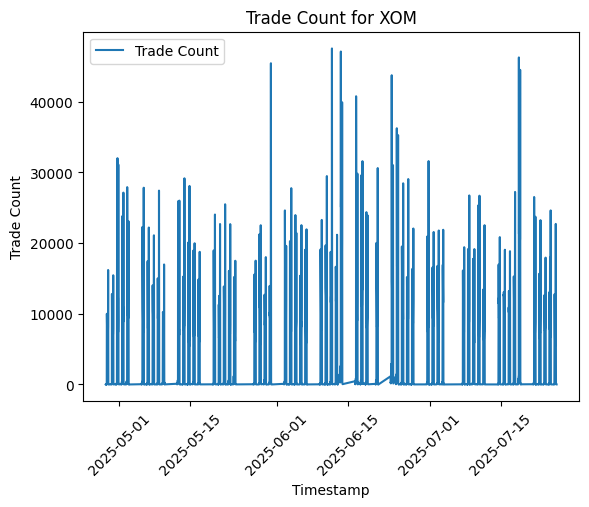

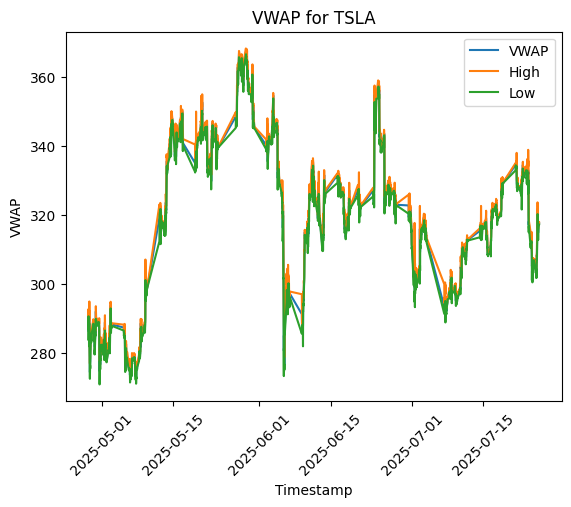

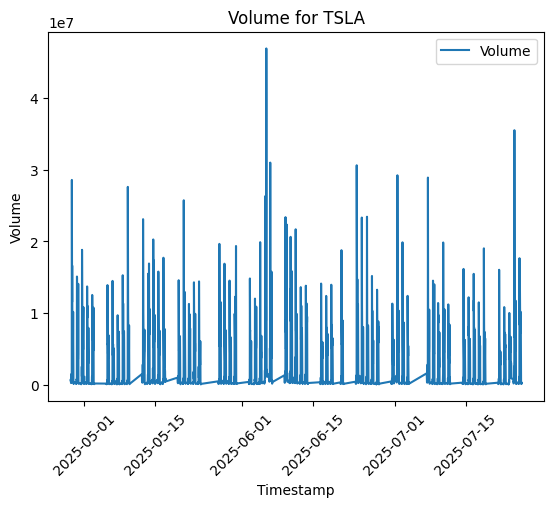

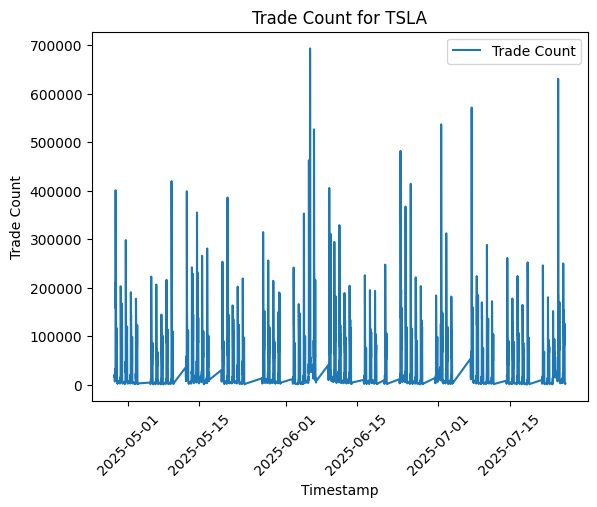

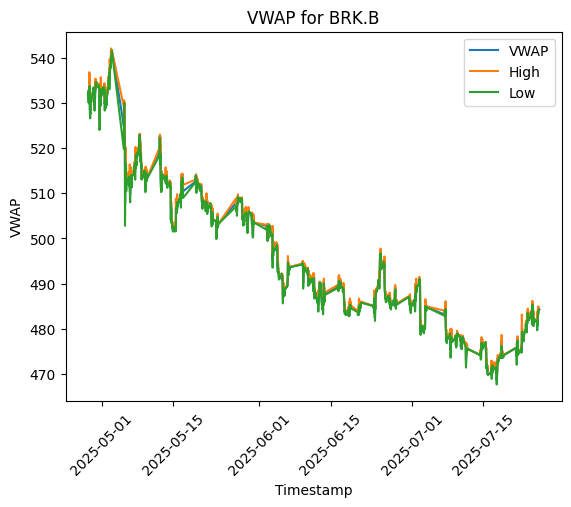

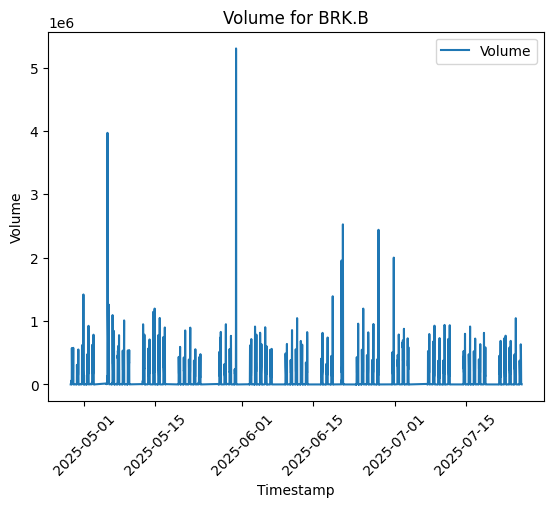

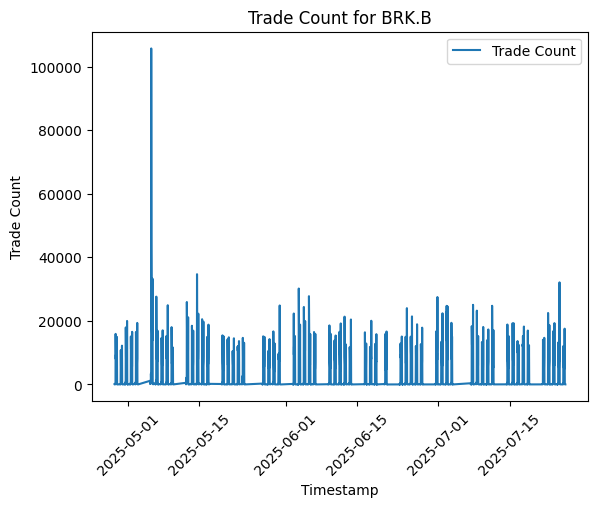

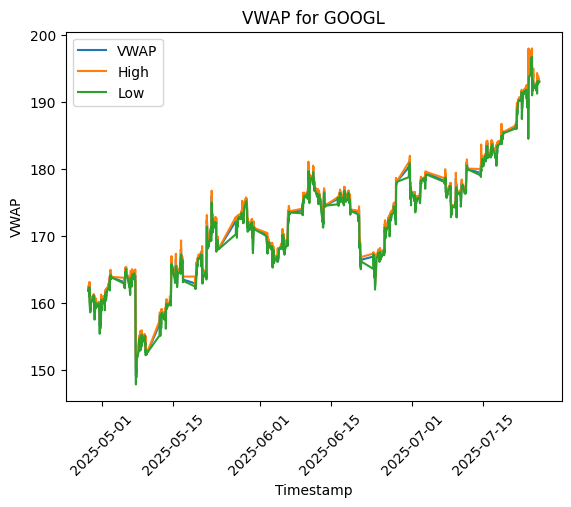

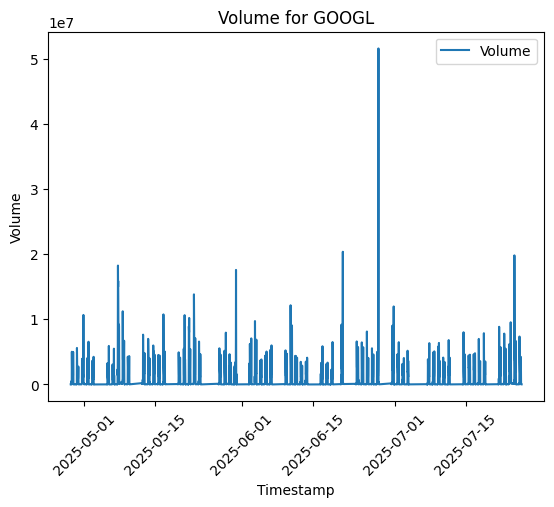

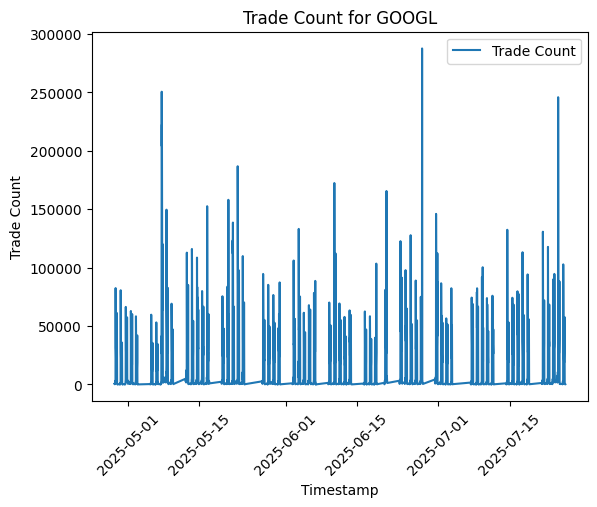

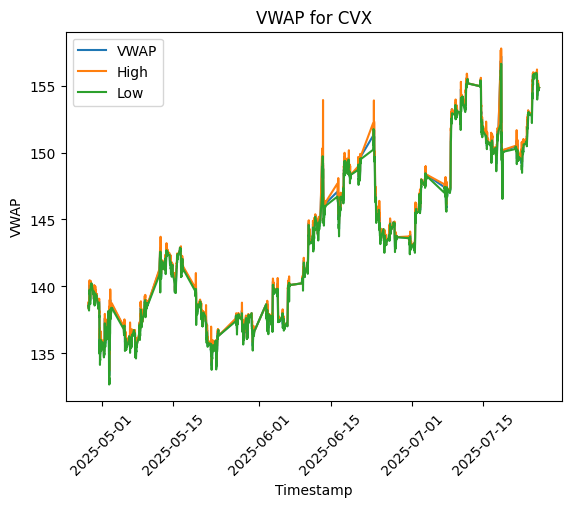

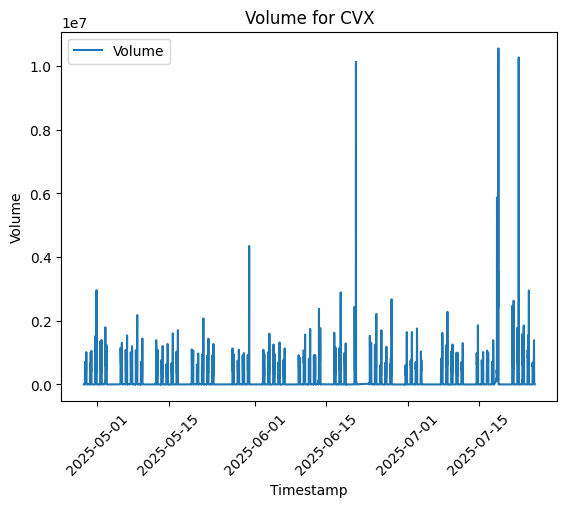

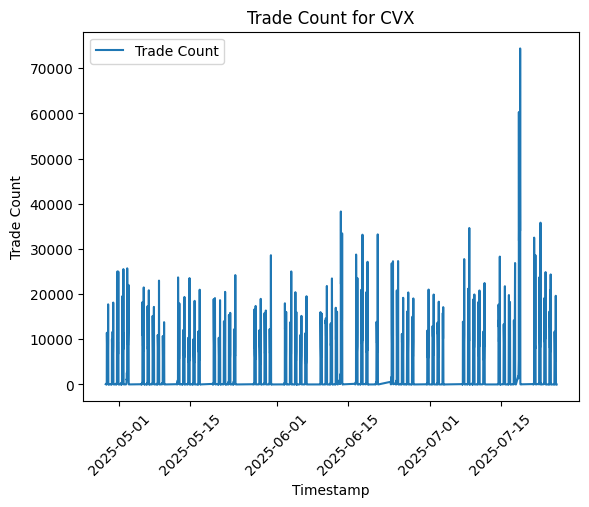

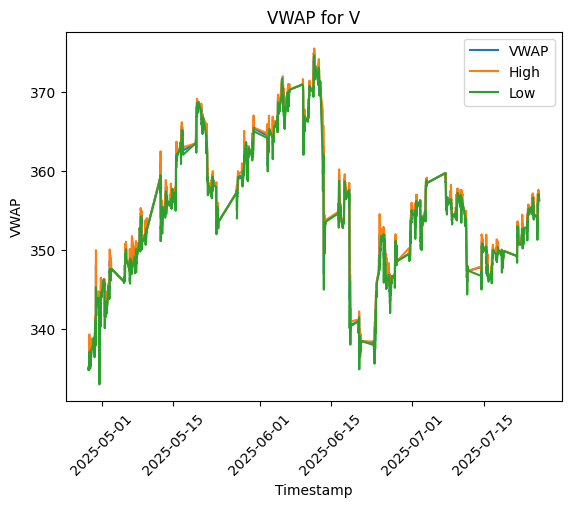

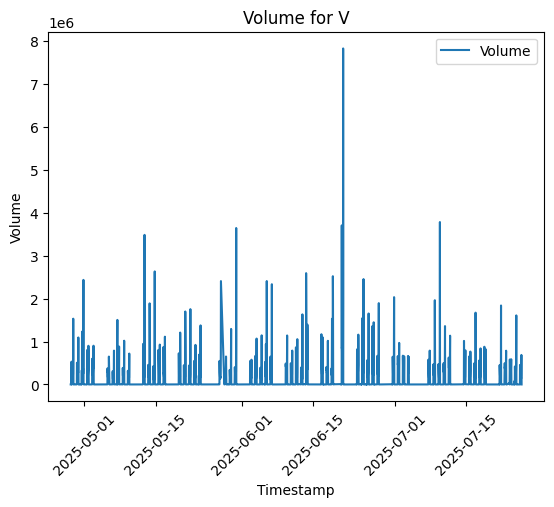

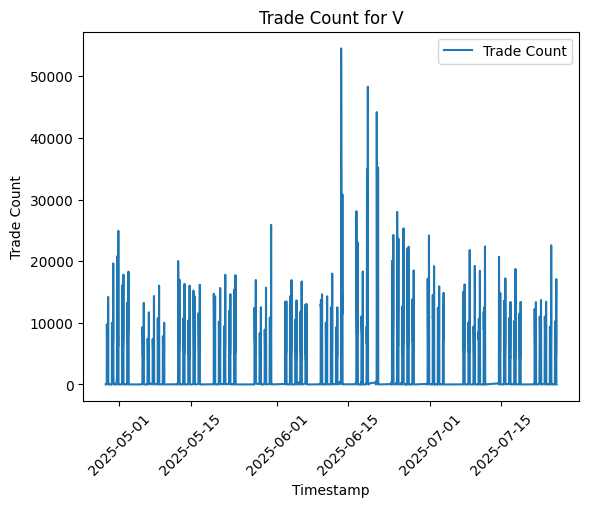

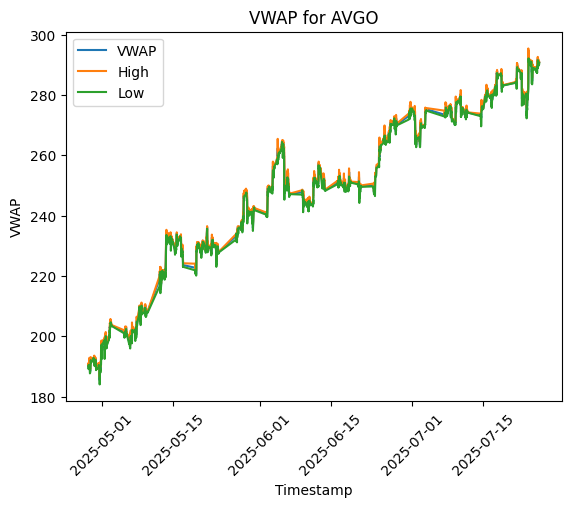

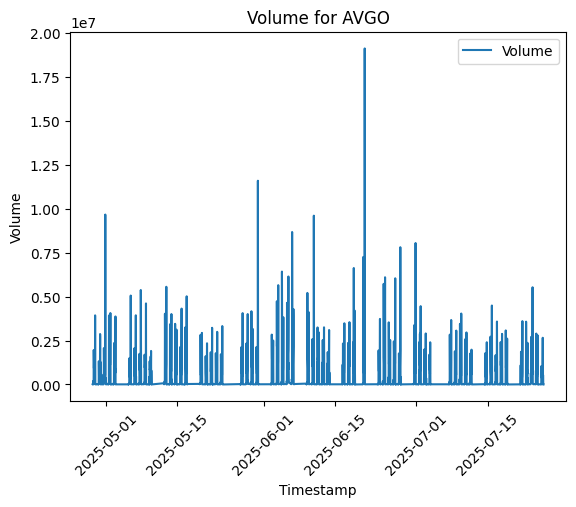

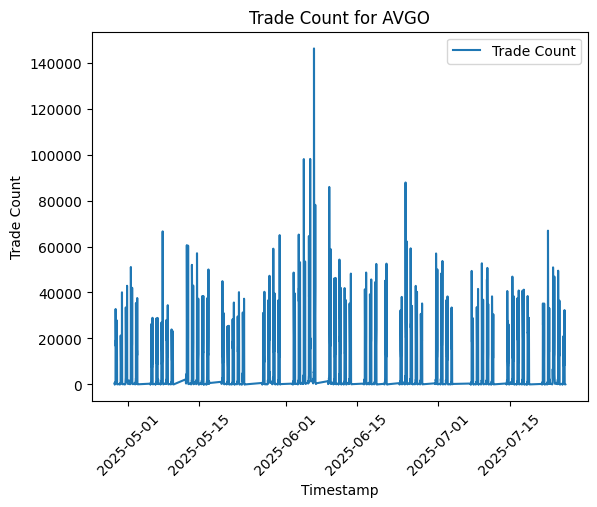

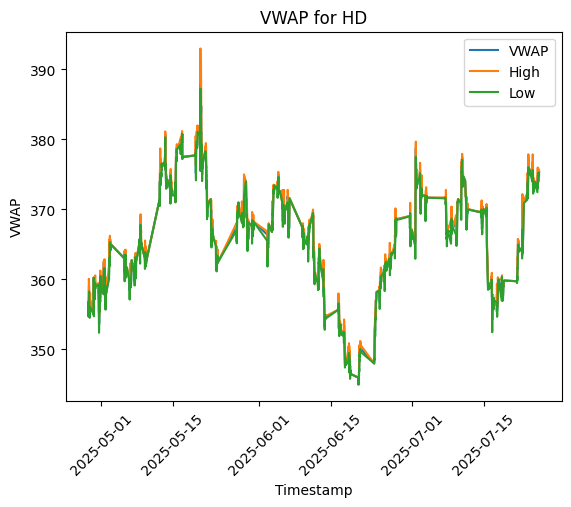

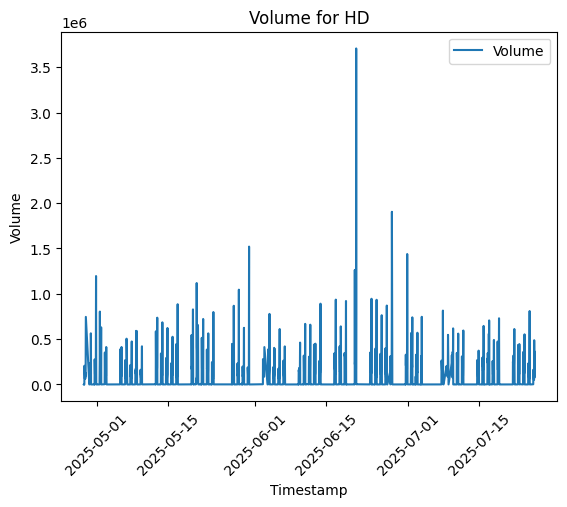

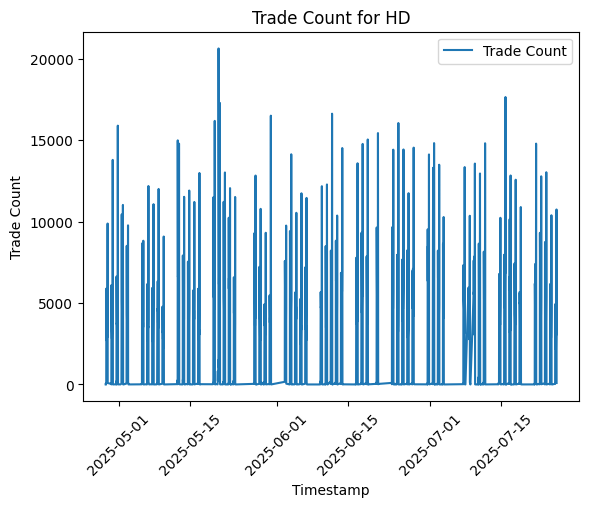

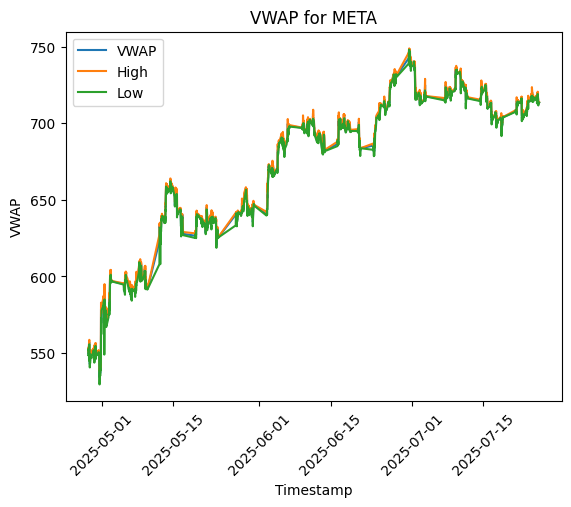

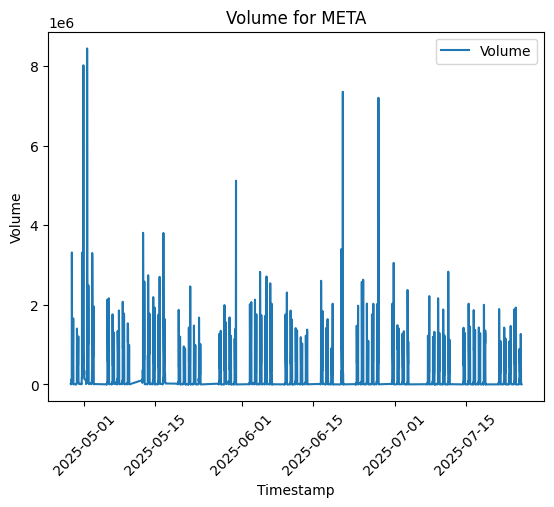

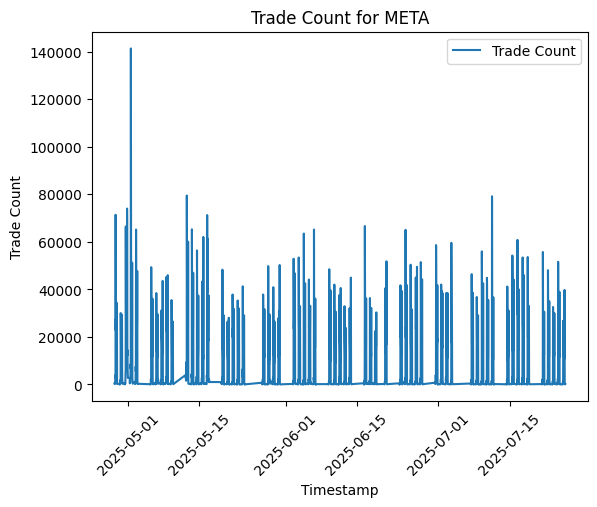

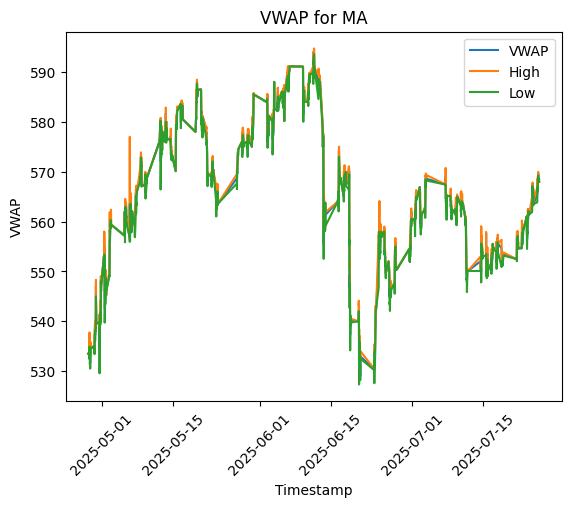

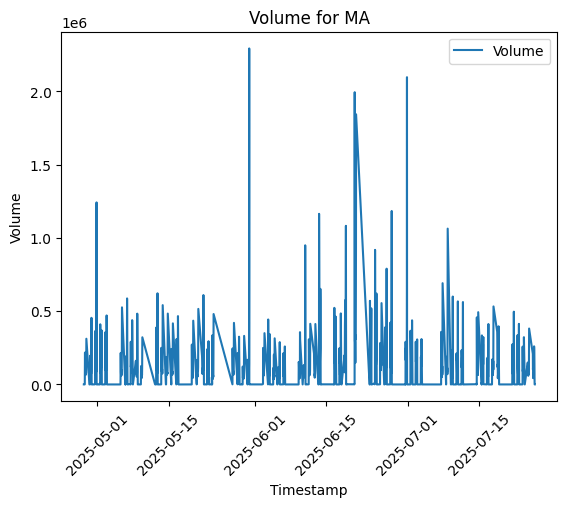

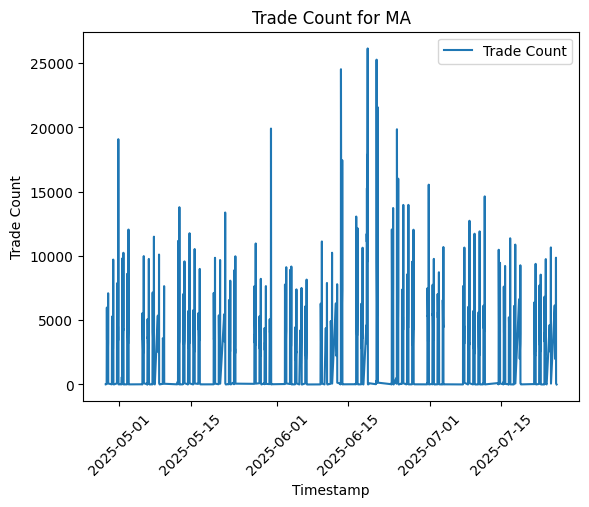

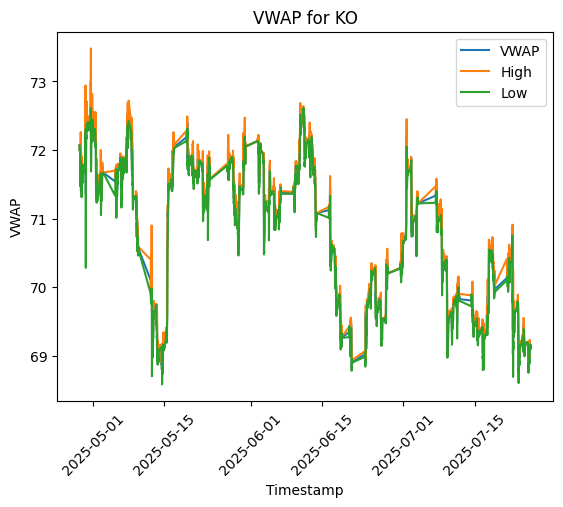

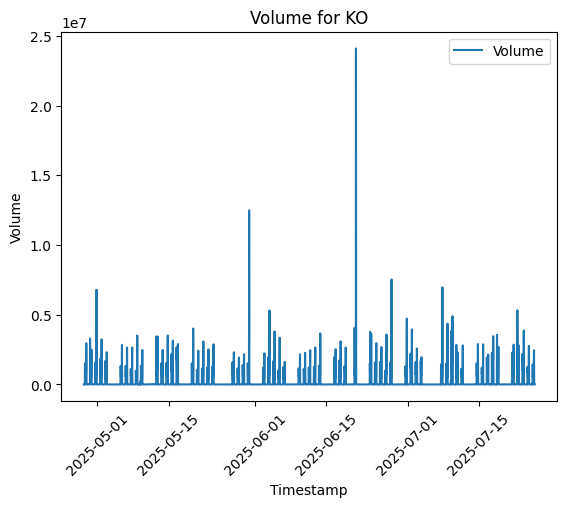

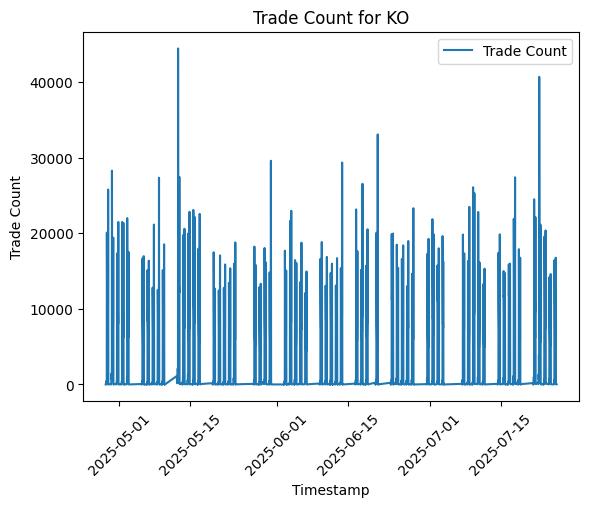

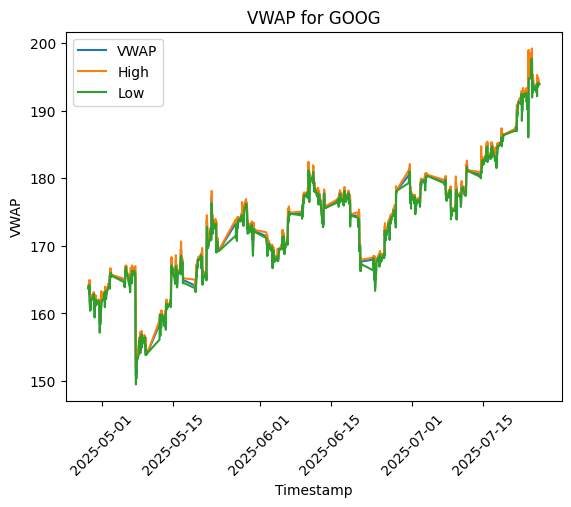

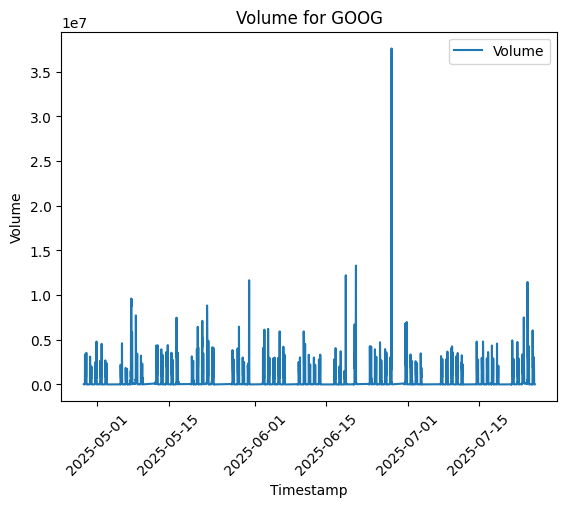

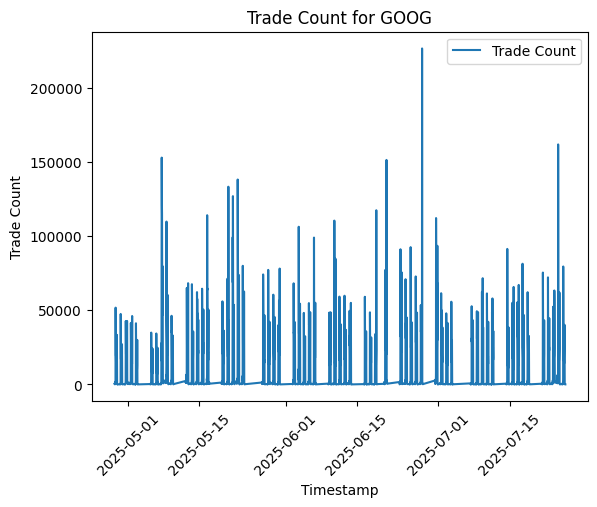

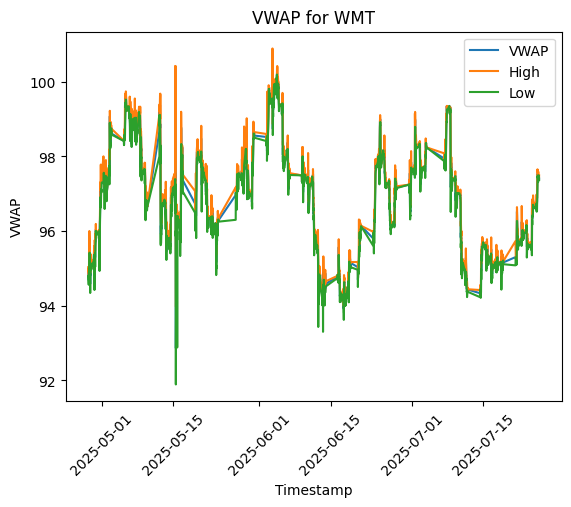

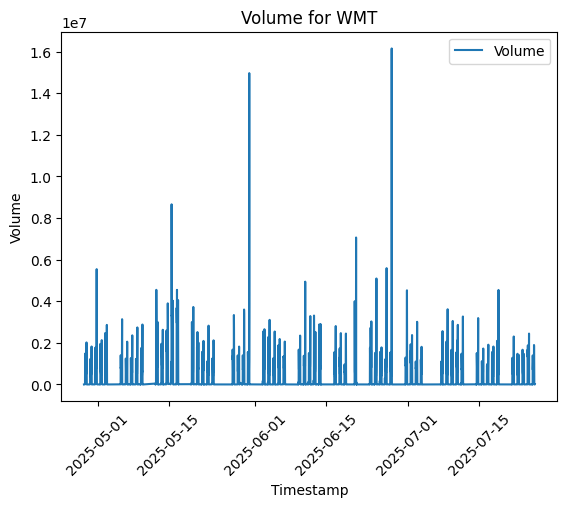

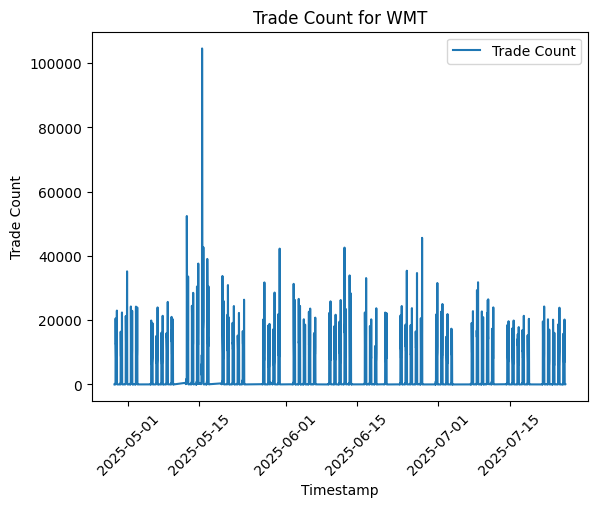

In [43]:
# for every file in data, plot the vwap price 
# below also show the volume of the stock

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# get all the files in the data folder
files = os.listdir("data")

# each file looks like this
""" symbol,timestamp,open,high,low,close,volume,trade_count,vwap
NVDA,2025-04-28 08:00:00+00:00,109.93,110.45,109.07,109.24,591234.0,9397.0,109.544254
NVDA,2025-04-28 08:30:00+00:00,109.22,109.8,109.06,109.5,509076.0,6117.0,109.426252
NVDA,2025-04-28 09:00:00+00:00,109.5,109.95,109.38,109.93,302491.0,4373.0,109.593339 """
# plot the vwap price for each file
for file in files:
    data = pd.read_csv(f"data/{file}")

    # convert the timestamp to datetime
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # plot the vwap price
    sns.lineplot(x='timestamp', y='vwap', data=data, label='VWAP')

    # show open and close prices on the same plot
    sns.lineplot(x='timestamp', y='high', data=data, label='High')
    sns.lineplot(x='timestamp', y='low', data=data, label='Low')

    plt.xlabel('Timestamp')
    # make the x axis label rotate 90 degrees
    plt.xticks(rotation=45)
    plt.ylabel('VWAP')
    plt.title(f'VWAP for {file.split("_")[0]}')
    plt.legend()

    plt.show()

    # also plot the volume
    sns.lineplot(x='timestamp', y='volume', data=data, label='Volume')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.title(f'Volume for {file.split("_")[0]}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # plot the trade count
    sns.lineplot(x='timestamp', y='trade_count', data=data, label='Trade Count')
    plt.xlabel('Timestamp')
    plt.ylabel('Trade Count')
    plt.title(f'Trade Count for {file.split("_")[0]}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

In [45]:
# pair each stock up with another stock
# find the correlation between the two stocks with vwap
# store the correlation in something and show me the top 10 correlations

# get all the files in the data folder
files = os.listdir("data")

results = []

# only open the two files we want to look at
for file in files:
    data = pd.read_csv(f"data/{file}")
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['vwap'] = data['vwap'].astype(float)

    for file2 in files:
        if file == file2:
            continue

        # check results for this pair or the reverse pair
        if any(result['stock1'] == file and result['stock2'] == file2 for result in results) or any(result['stock1'] == file2 and result['stock2'] == file for result in results):
            print(f"Skipping {file} and {file2} because they are already in the results")
            continue

        data2 = pd.read_csv(f"data/{file2}")
        data2['timestamp'] = pd.to_datetime(data2['timestamp'])
        data2['vwap'] = data2['vwap'].astype(float)

        # calculate the correlation between the two stocks
        correlation = data['vwap'].corr(data2['vwap'])
        print(f"Correlation between {file} and {file2}: {correlation}")
        results.append({'stock1': file, 'stock2': file2, 'correlation': correlation})

# sort the results by correlation
results.sort(key=lambda x: x['correlation'], reverse=True)

# print the top 10 results
for result in results[:10]:
    print(result)

Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and JNJ_2025-04-27_2025-07-26_30_Min.csv: 0.4957954518718944
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and AAPL_2025-04-27_2025-07-26_30_Min.csv: 0.2199942969004089
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and TMUS_2025-04-27_2025-07-26_30_Min.csv: -0.3912652605324863
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and AMZN_2025-04-27_2025-07-26_30_Min.csv: 0.934668764006091
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and PG_2025-04-27_2025-07-26_30_Min.csv: -0.36997840166598417
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and LLY_2025-04-27_2025-07-26_30_Min.csv: -0.29045903138845663
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and ORCL_2025-04-27_2025-07-26_30_Min.csv: 0.9297944959862241
Correlation between MSFT_2025-04-27_2025-07-26_30_Min.csv and NVDA_2025-04-27_2025-07-26_30_Min.csv: 0.9645277239841923
Correlation between MSFT_2025-04-27_2025

In [47]:
# tell me what the highest correlated stocks are from this data
print('highest correlated stocks')
for result in results[:20]:
    print(f"Stocks: {result['stock1'].split('_')[0]} and {result['stock2'].split('_')[0]} with correlation: {result['correlation']}")

# tell me what the lowest correlated stocks are from this data
print('lowest correlated stocks')
for result in results[-20:]:
    print(f"Stocks: {result['stock1'].split('_')[0]} and {result['stock2'].split('_')[0]} with correlation: {result['correlation']}")

highest correlated stocks
Stocks: GOOGL and GOOG with correlation: 0.9978530292844207
Stocks: NVDA and AVGO with correlation: 0.9800101549061129
Stocks: MSFT and AVGO with correlation: 0.965185112422076
Stocks: MSFT and NVDA with correlation: 0.9645277239841923
Stocks: AMZN and NVDA with correlation: 0.9615538553327896
Stocks: AMZN and AVGO with correlation: 0.9520781308997047
Stocks: CSCO and BAC with correlation: 0.949055356263677
Stocks: CSCO and META with correlation: 0.9490010019136722
Stocks: MSFT and CSCO with correlation: 0.9458129673765523
Stocks: MSFT and META with correlation: 0.9444209177121242
Stocks: CSCO and AVGO with correlation: 0.9437448352679322
Stocks: AVGO and META with correlation: 0.941769630992161
Stocks: ORCL and JPM with correlation: 0.9412701017568106
Stocks: NVDA and GE with correlation: 0.9363448073963186
Stocks: MSFT and AMZN with correlation: 0.934668764006091
Stocks: BAC and AVGO with correlation: 0.9336998094365754
Stocks: MSFT and BAC with correlation:

In [48]:
# take the absolute value of the correlation and show me the bottom 10
# Take the absolute value of the correlation and show the 10 pairs with the lowest absolute correlation
sorted_by_abs_corr = sorted(results, key=lambda x: abs(x['correlation']))
print("10 pairs with the lowest absolute correlation:")
for result in sorted_by_abs_corr[:10]:
    print(f"Stocks: {result['stock1'].split('_')[0]} and {result['stock2'].split('_')[0]} with correlation: {result['correlation']}")


10 pairs with the lowest absolute correlation:
Stocks: BRK.B and HD with correlation: -0.00015097058694134194
Stocks: JPM and MA with correlation: -0.0017162347653510916
Stocks: META and MA with correlation: 0.0026293708747925576
Stocks: JPM and ABBV with correlation: 0.0039043482412290595
Stocks: LLY and GOOG with correlation: -0.004363395589924731
Stocks: TSLA and MA with correlation: 0.005220128347381457
Stocks: AAPL and ABBV with correlation: 0.008950834529204008
Stocks: CSCO and HD with correlation: -0.010065432407112674
Stocks: AMZN and HD with correlation: 0.010886766223763496
Stocks: AAPL and HD with correlation: 0.013709792664670154


10 pairs with the highest absolute correlation:
Stocks: GOOGL and GOOG with correlation: 0.9978530292844207


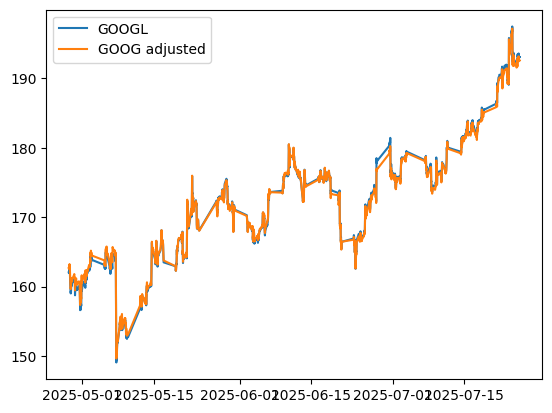

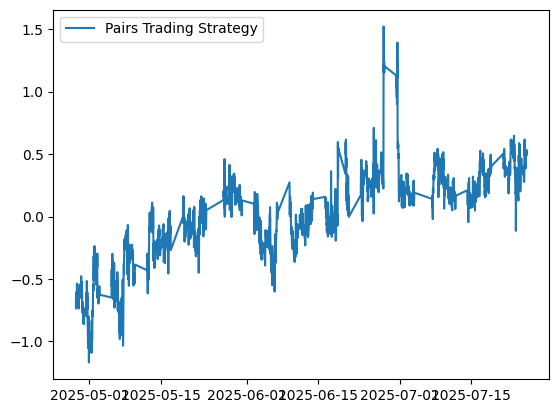

Stocks: NVDA and AVGO with correlation: 0.9800101549061129


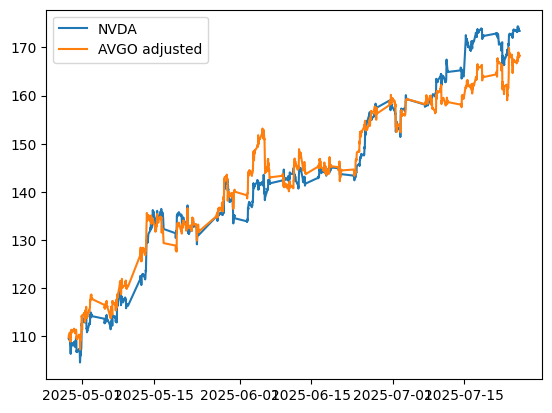

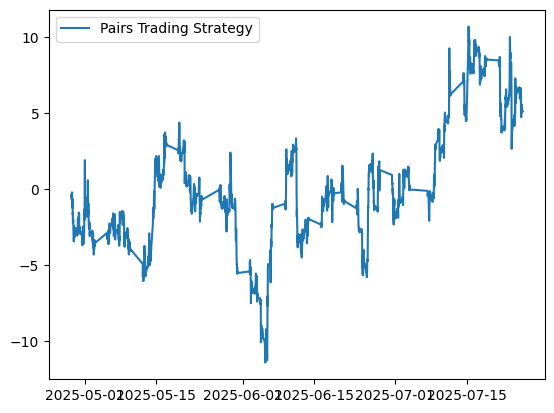

Stocks: MSFT and AVGO with correlation: 0.965185112422076


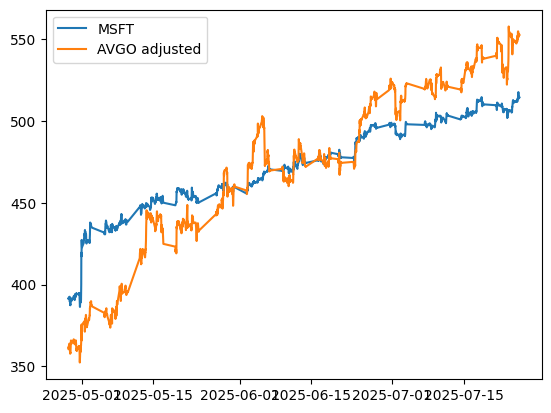

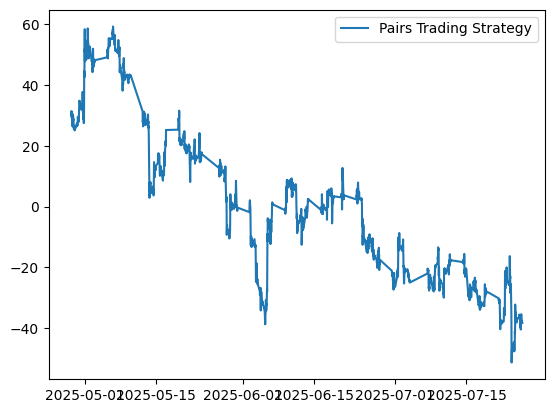

Stocks: MSFT and NVDA with correlation: 0.9645277239841923


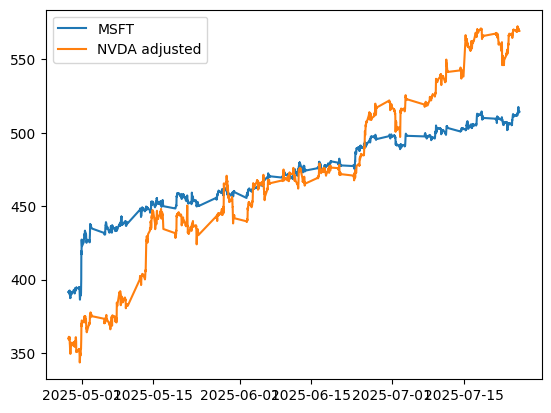

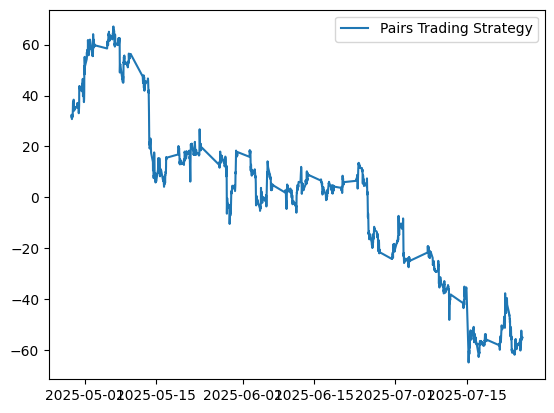

Stocks: AMZN and NVDA with correlation: 0.9615538553327896


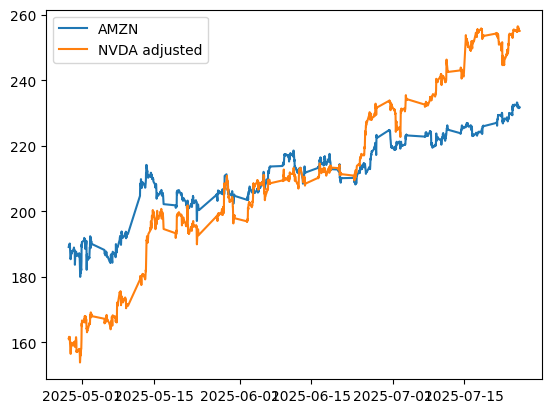

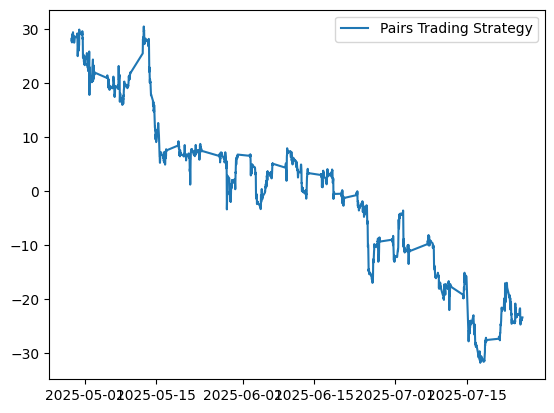

Stocks: BRK.B and META with correlation: -0.9522440822109577


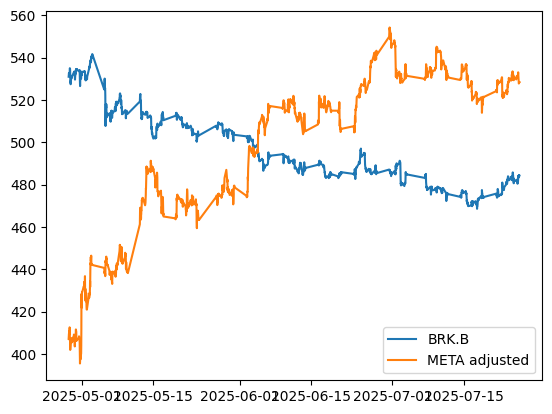

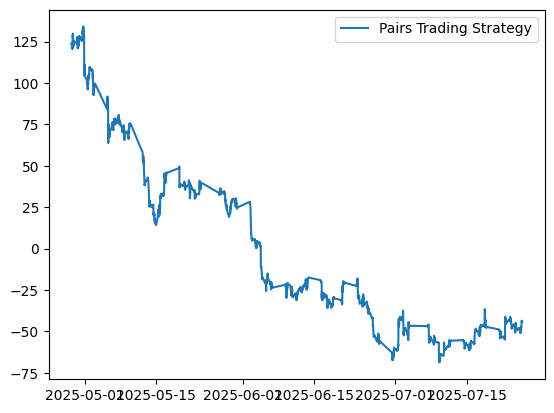

Stocks: AMZN and AVGO with correlation: 0.9520781308997047


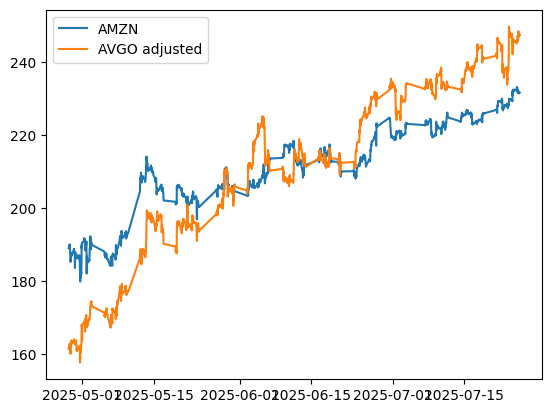

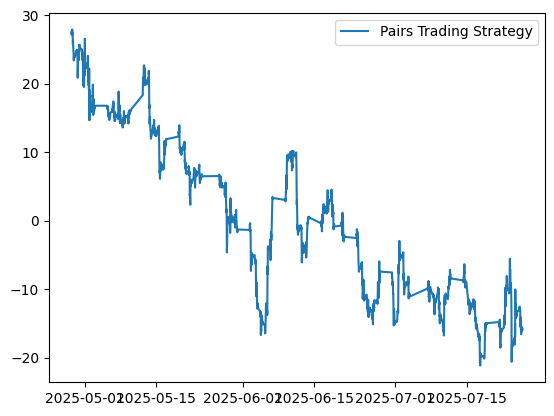

Stocks: CSCO and BAC with correlation: 0.949055356263677


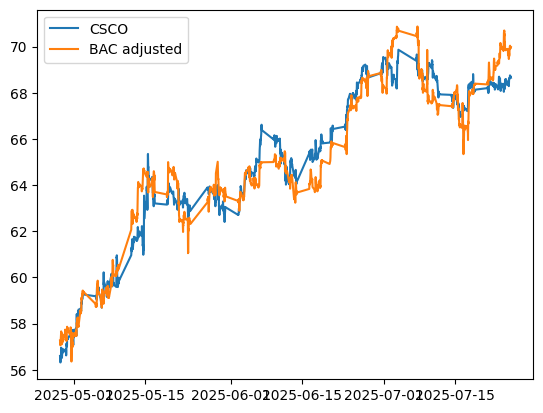

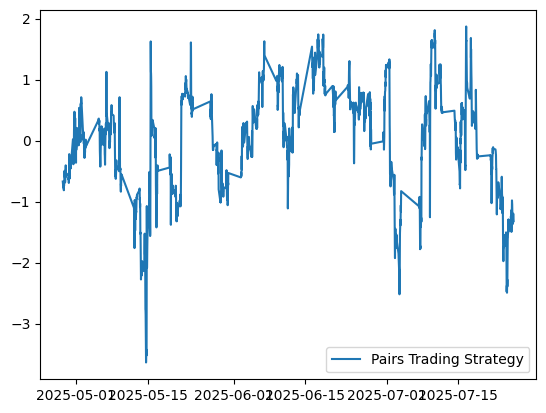

Stocks: CSCO and META with correlation: 0.9490010019136722


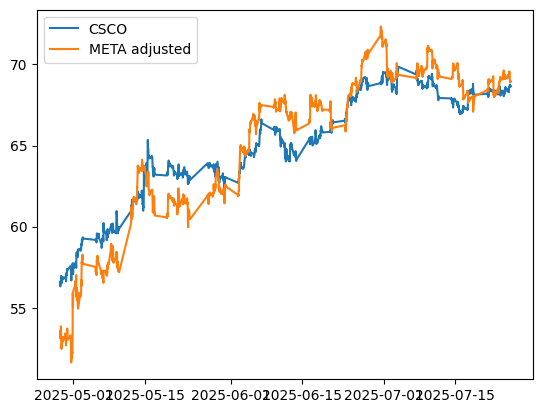

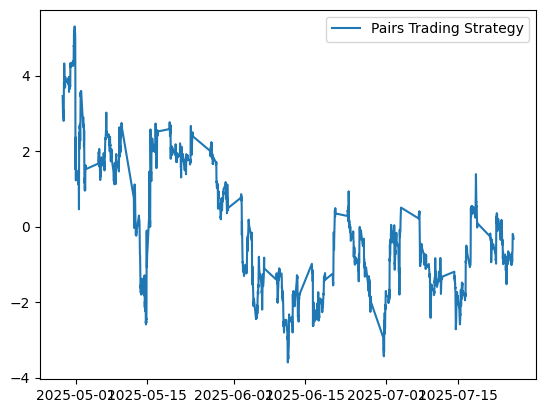

Stocks: MSFT and CSCO with correlation: 0.9458129673765523


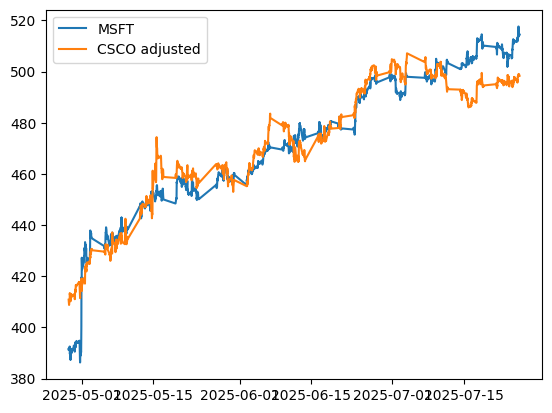

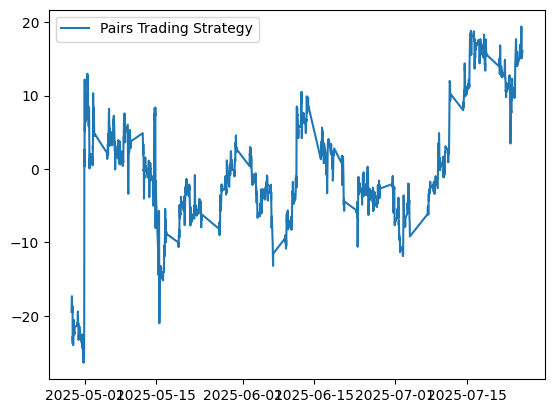

In [59]:
sorted_by_abs_corr = sorted(results, key=lambda x: abs(x['correlation']), reverse=True)
print("10 pairs with the highest absolute correlation:")
for result in sorted_by_abs_corr[:10]:
    print(f"Stocks: {result['stock1'].split('_')[0]} and {result['stock2'].split('_')[0]} with correlation: {result['correlation']}")

    # now take microsoft and nvidia. create a plot to see if the stocks are stationary for a pairs trading strategy
    tickers = [result['stock1'].split("_")[0], result['stock2'].split("_")[0]]
    # read the data for microsoft and nvidia
    data1 = pd.read_csv(f"data/{tickers[0]}_2025-04-27_2025-07-26_30_Min.csv")
    data2 = pd.read_csv(f"data/{tickers[1]}_2025-04-27_2025-07-26_30_Min.csv")

    # convert the timestamp to datetime
    data1['timestamp'] = pd.to_datetime(data1['timestamp'])
    data2['timestamp'] = pd.to_datetime(data2['timestamp'])

    # calcualte the means of both to get the ratio to multiply data2 by to get the same mean as data1 and plot the ratio
    ratio = data1['vwap'].mean() / data2['vwap'].mean()
    data2['vwap_adjusted'] = data2['vwap'] * ratio

    # plot the two stocks on the same plot
    plt.plot(data1['timestamp'], data1['vwap'], label=tickers[0])
    plt.plot(data2['timestamp'], data2['vwap_adjusted'], label=tickers[1] + ' adjusted')
    plt.legend()
    plt.show()

    # create another plot which is the difference between the two stocks
    # Align the data on timestamp before subtracting to ensure same length
    merged = pd.merge(
        data1[['timestamp', 'vwap']],
        data2[['timestamp', 'vwap_adjusted']],
        on='timestamp',
        how='inner'
    )
    plt.plot(merged['timestamp'], merged['vwap'] - merged['vwap_adjusted'], label='Pairs Trading Strategy')
    plt.legend()
    plt.show()

10 pairs with the lowest absolute correlation:
Stocks: BRK.B and HD with correlation: -0.00015097058694134194


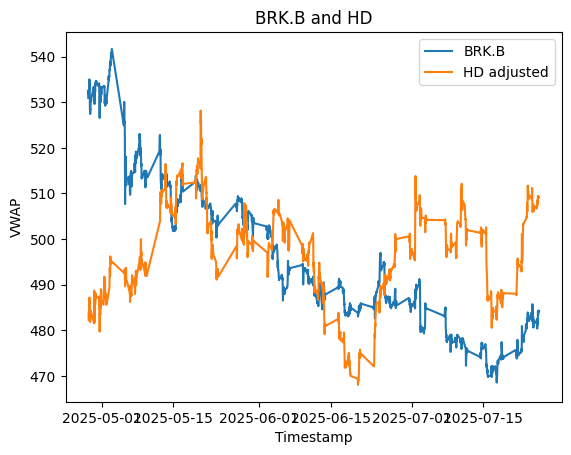

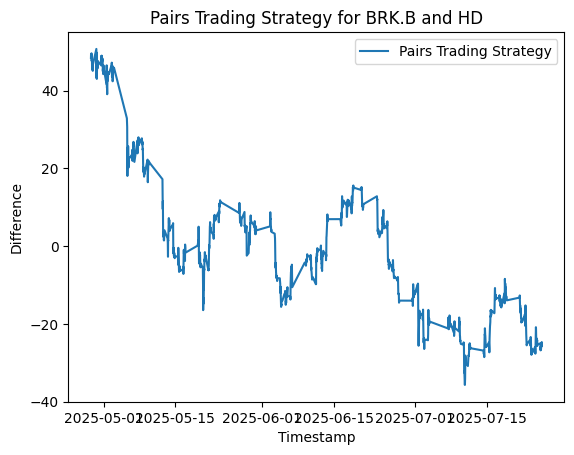

Stocks: JPM and MA with correlation: -0.0017162347653510916


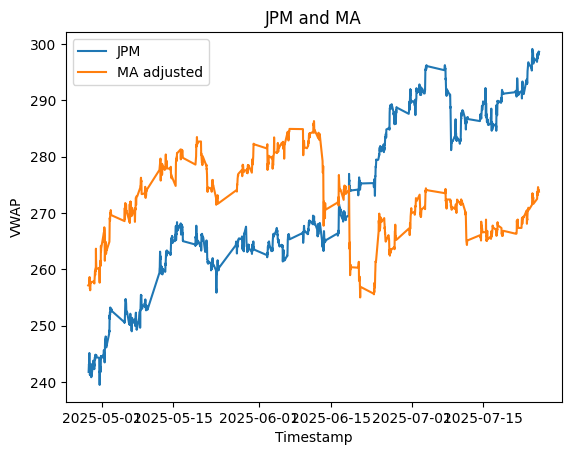

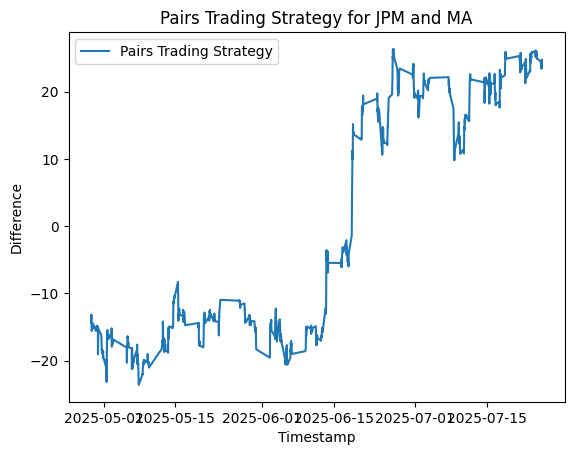

Stocks: META and MA with correlation: 0.0026293708747925576


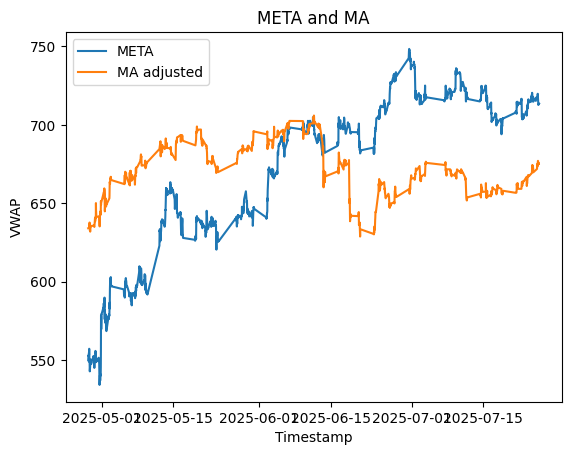

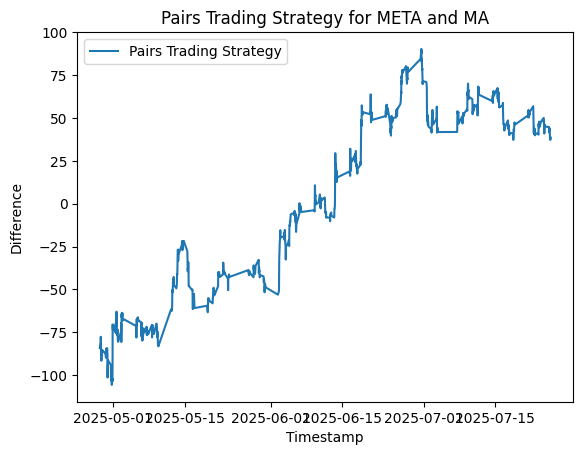

Stocks: JPM and ABBV with correlation: 0.0039043482412290595


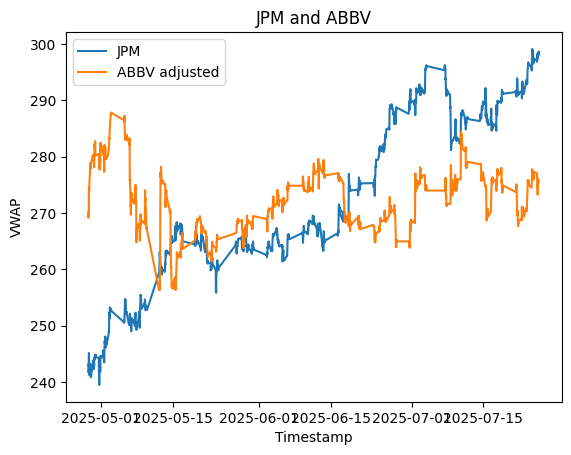

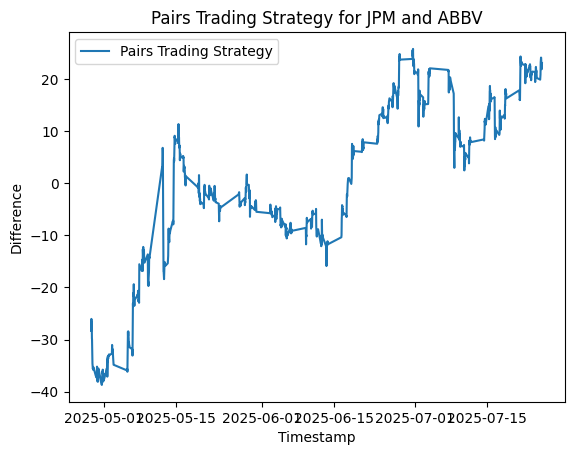

Stocks: LLY and GOOG with correlation: -0.004363395589924731


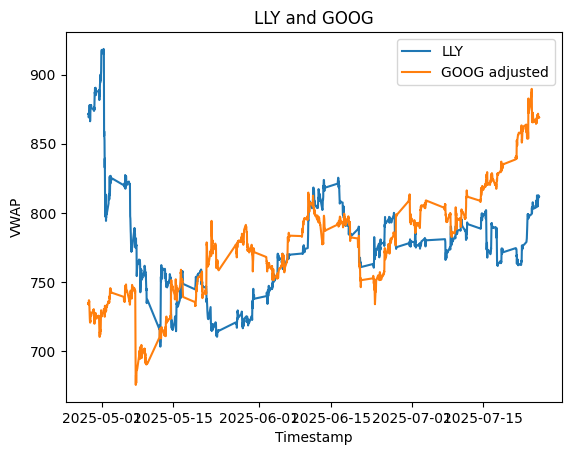

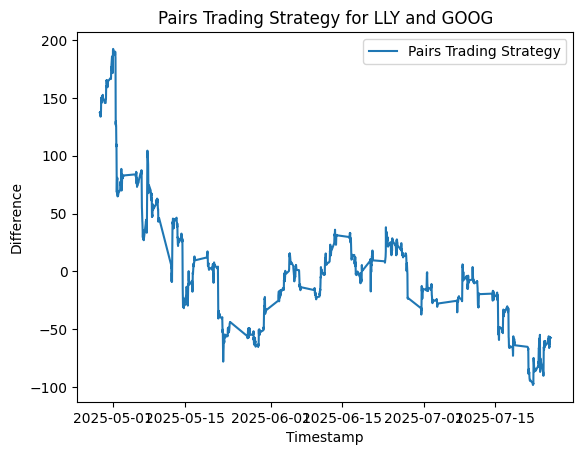

Stocks: TSLA and MA with correlation: 0.005220128347381457


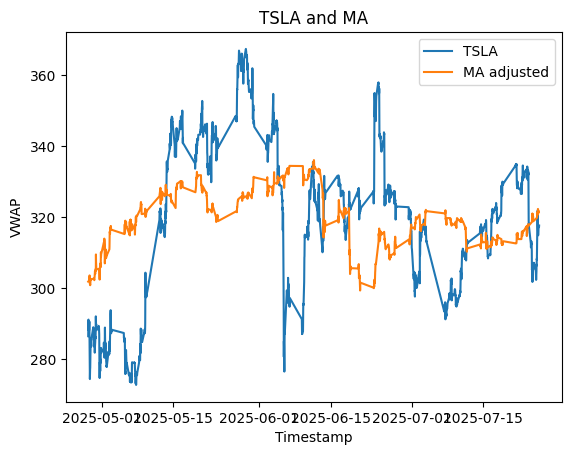

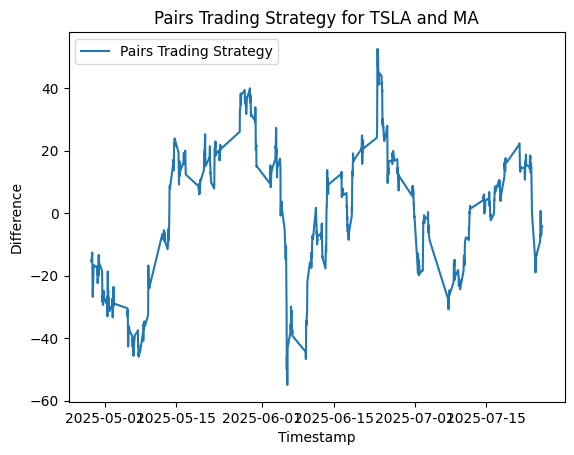

Stocks: AAPL and ABBV with correlation: 0.008950834529204008


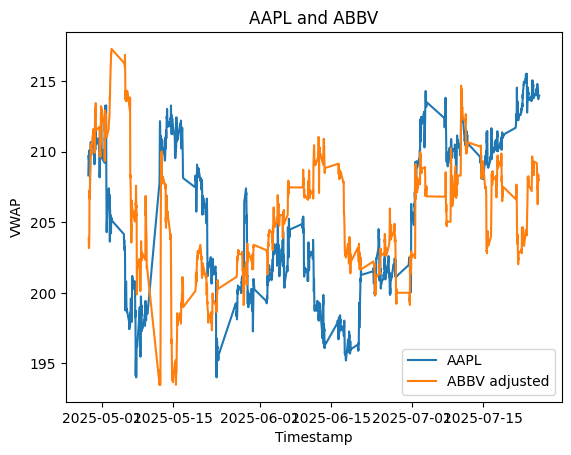

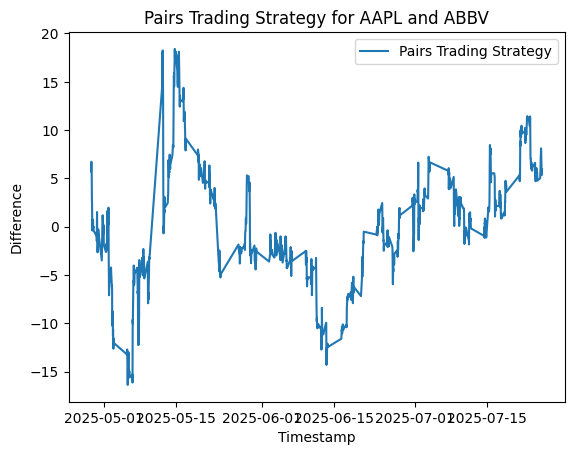

Stocks: CSCO and HD with correlation: -0.010065432407112674


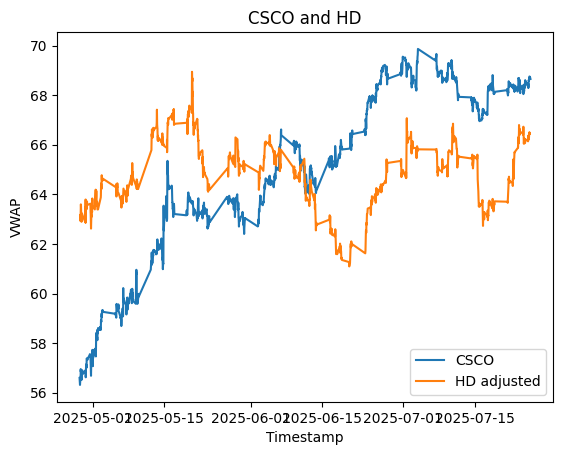

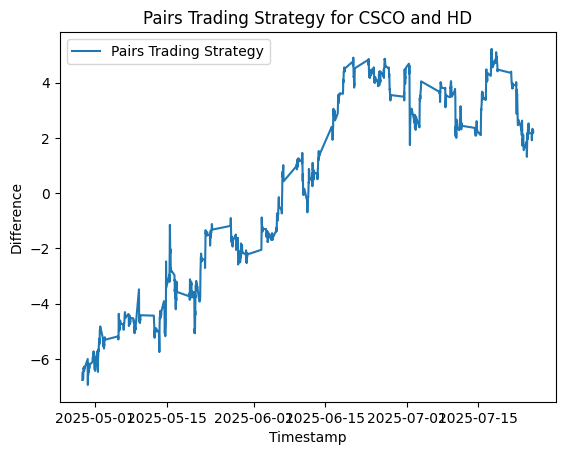

Stocks: AMZN and HD with correlation: 0.010886766223763496


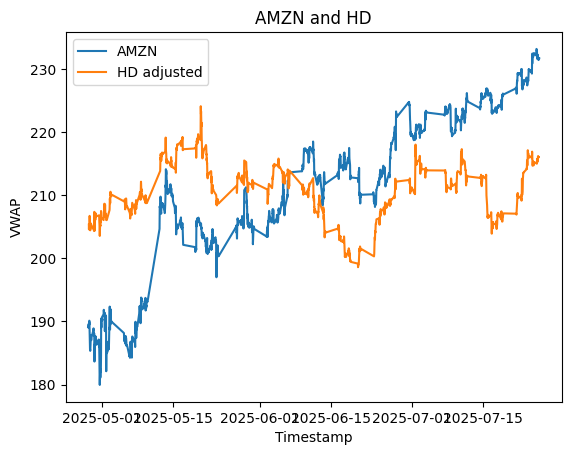

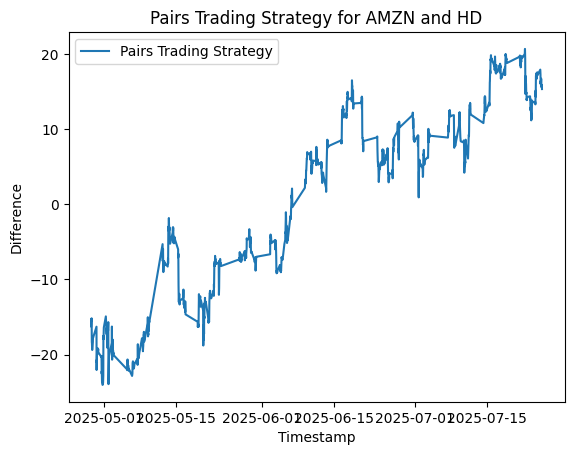

Stocks: AAPL and HD with correlation: 0.013709792664670154


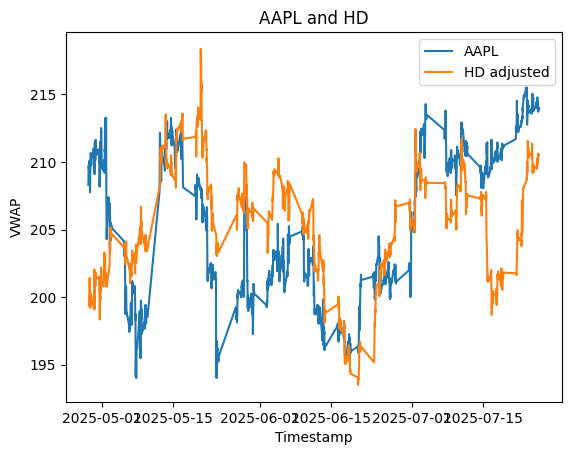

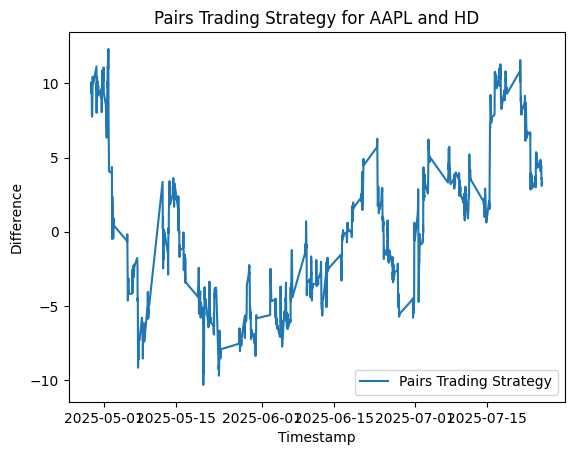

In [61]:
sorted_by_abs_corr = sorted(results, key=lambda x: abs(x['correlation']))
print("10 pairs with the lowest absolute correlation:")
for result in sorted_by_abs_corr[:10]:
    print(f"Stocks: {result['stock1'].split('_')[0]} and {result['stock2'].split('_')[0]} with correlation: {result['correlation']}")

    # now take microsoft and nvidia. create a plot to see if the stocks are stationary for a pairs trading strategy
    tickers = [result['stock1'].split("_")[0], result['stock2'].split("_")[0]]
    # read the data for microsoft and nvidia
    data1 = pd.read_csv(f"data/{tickers[0]}_2025-04-27_2025-07-26_30_Min.csv")
    data2 = pd.read_csv(f"data/{tickers[1]}_2025-04-27_2025-07-26_30_Min.csv")

    # convert the timestamp to datetime
    data1['timestamp'] = pd.to_datetime(data1['timestamp'])
    data2['timestamp'] = pd.to_datetime(data2['timestamp'])

    # calcualte the means of both to get the ratio to multiply data2 by to get the same mean as data1 and plot the ratio
    ratio = data1['vwap'].mean() / data2['vwap'].mean()
    data2['vwap_adjusted'] = data2['vwap'] * ratio

    # plot the two stocks on the same plot
    plt.plot(data1['timestamp'], data1['vwap'], label=tickers[0])
    plt.plot(data2['timestamp'], data2['vwap_adjusted'], label=tickers[1] + ' adjusted')
    plt.legend()
    plt.title(f'{tickers[0]} and {tickers[1]}')
    plt.xlabel('Timestamp')
    plt.ylabel('VWAP')
    plt.show()

    # create another plot which is the difference between the two stocks
    # Align the data on timestamp before subtracting to ensure same length
    merged = pd.merge(
        data1[['timestamp', 'vwap']],
        data2[['timestamp', 'vwap_adjusted']],
        on='timestamp',
        how='inner'
    )
    plt.plot(merged['timestamp'], merged['vwap'] - merged['vwap_adjusted'], label='Pairs Trading Strategy')
    plt.legend()
    plt.title(f'Pairs Trading Strategy for {tickers[0]} and {tickers[1]}')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference')
    plt.show()